**Méthodes numériques, PHYS-F303 (Module 6).***
*********************************
Méthode de Monte-Carlo, Mouvement Brownien, Modèle d'Ising
==
### But #
Travailler avec des nombres pseudo-aléatoires pour générer une certaine distribution  etc.



## Challenge 1: Nombres aléatoires
Enoncé:
"1) Python has many built-in random number generators. Check-out the documentation and try a couple of ones. In particular, compare the output of the built-in expontential and Gaussian generators with the versions implemented above.

2) Another popular method to generate numbers according to the Gaussian distribution is known as the Box–Muller algorithm. Look up its definition on the web, try to implement it and verify that it works as expected."

### Question 1:

In [1]:
from matplotlib import pyplot
import numpy
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [2]:
i=0
a=numpy.zeros(100000)
while i<(len(a)-1) :
    
    
    a[i]=(numpy.random.uniform(42,50))
    i+=1

In [3]:
i=0
b=numpy.zeros(100000)
while i<(len(a)-1) :
    
    t=numpy.random.random()
    b[i]=(42*(1-t)+t*50)
    i+=1

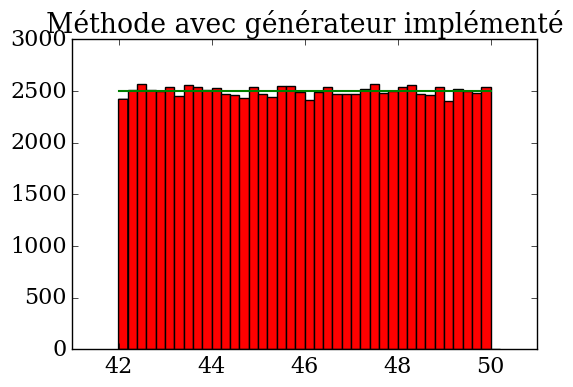

In [4]:
pyplot.title('Méthode avec générateur implémenté')
pyplot.xlim(41,51)
bins=numpy.arange(42,50.2, 0.2)
pyplot.hist(a,bins,normed=False, color = 'red');

xc = bins[:-1]

# nombre de bins de 42 à 50: n_bins = len(bins)-2
# nombre d'éléments par bin pour une répartition parfaitement uniforme  100000/n_bins

n_bins = len(bins)-2
y = numpy.ones(len(xc))*(100000/(n_bins))
pyplot.plot(xc,y,lw=1.5,color='green')


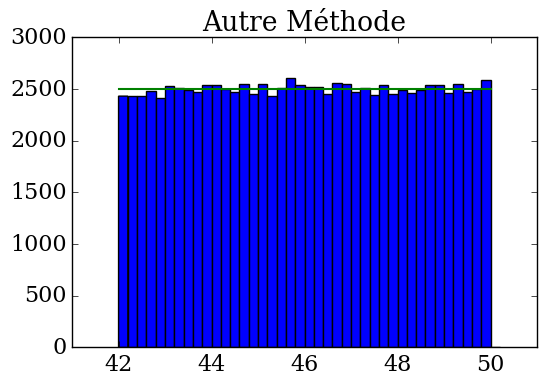

In [5]:
pyplot.title('Autre Méthode')
pyplot.xlim(41,51)
bins=numpy.arange(42,50.2, 0.2)
pyplot.hist(b,bins,normed=False, color = 'blue');

xc = bins[:-1]

# nombre de bins de 42 à 50: n_bins = len(bins)-2
# nombre d'éléments par bin pour une répartition parfaitement uniforme  100000/n_bins

n_bins = len(bins)-2
y = numpy.ones(len(xc))*(100000/(n_bins))
pyplot.plot(xc,y,lw=1.5,color='green')


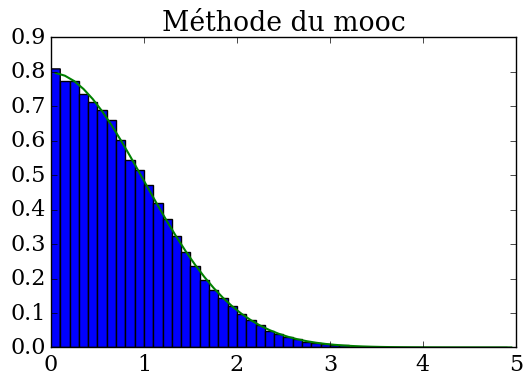

In [6]:
# Number of random numbers to draw according to p1 
K = 1.4

# Empty list for the final set of numbers
h=[]

while len(h)<100000:
    u1 = numpy.random.random_sample()
    
    # Distribute g according to the exponential distribution
    g = numpy.log(1/(1-u1))
    
    # Generate a second number for the acceptance/rejection condition
    u2 = numpy.random.random_sample()
    
    # Acceptance/rejection step
    ratio = 2*numpy.exp(-g**2/2.0)/numpy.sqrt(2*numpy.pi) / \
                (K*numpy.exp(-g))
    if (u2<ratio):
        # Append g to the set h
        h.append(g)


# Plots
binwidth=0.1
bins=numpy.arange(0.,5.1, binwidth)
pyplot.title('Méthode du mooc')
pyplot.hist(h,bins=numpy.arange(0.,5., binwidth),normed=True,color='blue');

# Compute centers of bins
xc = bins[:-1] + binwidth/2
pyplot.plot(xc,2*numpy.exp(-xc**2/2.0)/numpy.sqrt(2*numpy.pi),lw=1.5,color='green')


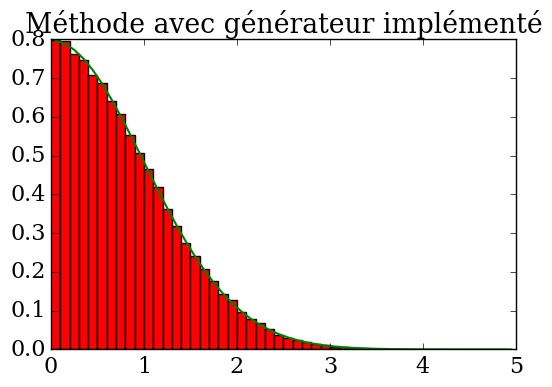

In [7]:
a=(numpy.random.normal(0,1,size=100000))

for i in range (len(a)) :
    if a[i]<0 :
        while a[i]<0 :
            a[i]=(numpy.random.normal(0,1,size=None))

# Plots
binwidth=0.1
bins=numpy.arange(0.,5.1, binwidth)
pyplot.title('Méthode avec générateur implémenté')
pyplot.hist(a,bins=numpy.arange(0,5., binwidth),normed=True,color='Red');

# Compute centers of bins
xc = bins[:-1] + binwidth/2
pyplot.plot(xc,2*numpy.exp(-xc**2/2.0)/numpy.sqrt(2*numpy.pi),lw=1.5,color='green')


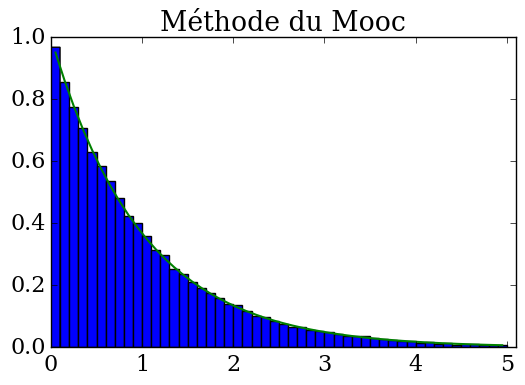

In [8]:
alpha = 1 # rate of the exponential distribution
x = numpy.random.random_sample(100000)
y = -1/alpha*numpy.log(1-x)

# Plots
binwidth=0.1
pyplot.xlim(0,5.1)
bins=numpy.arange(0.,5.1, binwidth)
pyplot.title('Méthode du Mooc')
pyplot.hist(y,bins,normed=True);

# Compute centers of bins
xc = bins[:-1] + binwidth/2
pyplot.plot(xc,alpha*numpy.exp(-alpha*xc), lw=1.5)


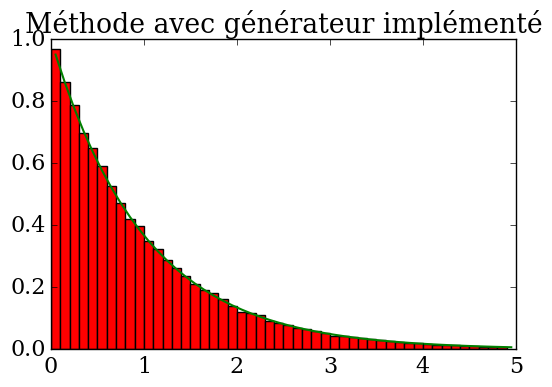

In [9]:
a=numpy.random.exponential(size=100000)

binwidth=0.1
bins=numpy.arange(0.,5.1, binwidth)
xc = bins[:-1] + binwidth/2
pyplot.plot(xc,numpy.exp(-xc),lw=1.5,color='green')

pyplot.title('Méthode avec générateur implémenté')
pyplot.xlim(0,5)
pyplot.hist(a,bins=numpy.arange(-3.,5., binwidth),normed=True, color = 'red');


### Question 2: Box Muller algorithm

On part de deux variables aléatoires indépendantes $U$ et $V$ uniformément distribuées sur [0,1]. L'algorithm de Box Muller les transforme en deux variables aléatoires indépendantes distribuées selon une Gaussienne de moyenne 0 et d'écart-type 1:
$$Z=\sqrt{-2ln(U)}cos(2\pi V)$$
$$W=\sqrt{-2ln(U)}sin(2\pi V)$$


In [10]:
i=0
u=numpy.zeros(100000)
v=numpy.zeros(100000)
while i<(len(u)) :
    u[i]=(numpy.random.uniform(0,1))
    v[i]=(numpy.random.uniform(0,1))
    i+=1

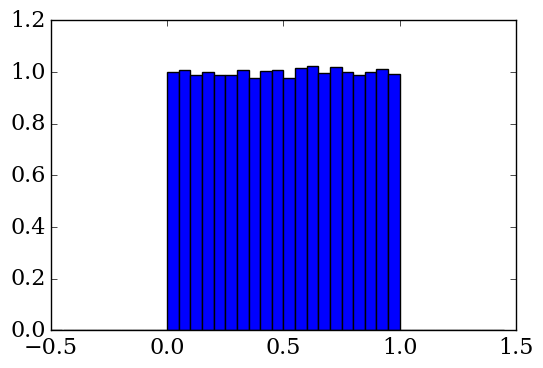

In [11]:
binwidth=0.05
pyplot.xlim(-0.5,1.5)
pyplot.hist(u,bins=numpy.arange(-0.5,1.5, binwidth),normed=True);

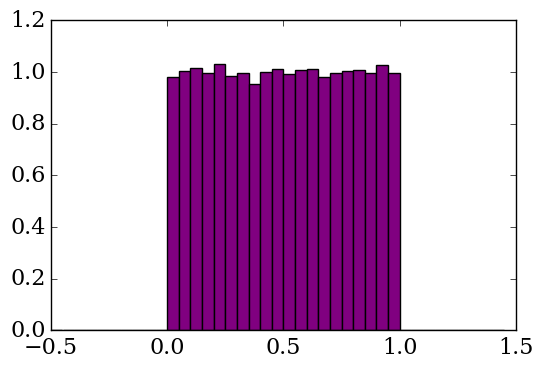

In [12]:
binwidth=0.05
pyplot.xlim(-0.5,1.5)
bins=numpy.arange(-0.5,1.5, binwidth)
pyplot.hist(v,bins,normed=True,color='purple');

In [13]:
z=numpy.zeros(100000)
w=numpy.zeros(100000)
for j in range (0,len(u)):
    z[j]=numpy.sqrt(-2*numpy.log(u[j]))*numpy.cos(2*numpy.pi*v[j])
    w[j]=numpy.sqrt(-2*numpy.log(u[j]))*numpy.sin(2*numpy.pi*v[j])

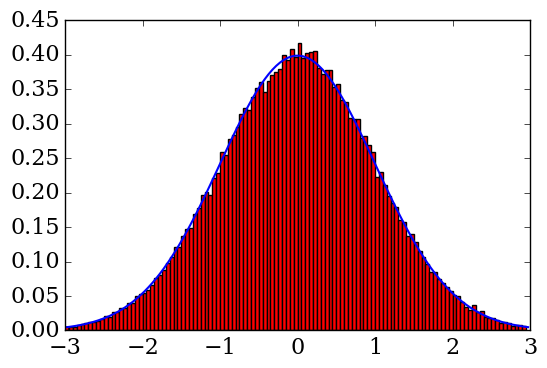

In [14]:
binwidth=0.05
bins=numpy.arange(-3.,3., binwidth)
pyplot.xlim(-3,3)
pyplot.hist(z,bins,normed=True, color='red');

xc = bins+(binwidth/2)
pyplot.plot(xc,numpy.exp(-xc**2/2.0)/numpy.sqrt(2*numpy.pi),lw=1.5,color='blue')

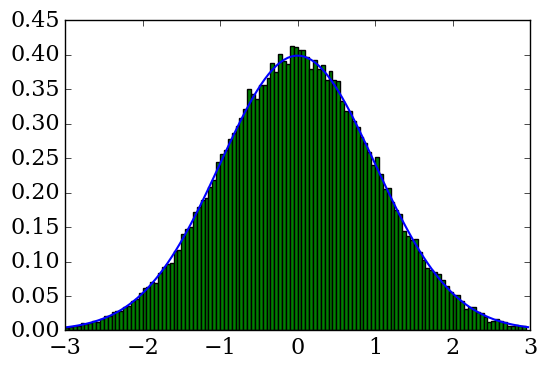

In [15]:
binwidth=0.05
pyplot.xlim(-3,3)
bins=numpy.arange(-3.,3., binwidth)
pyplot.hist(w,bins,normed=True,color='green');
xc = bins+(binwidth/2)
pyplot.plot(xc,numpy.exp(-xc**2/2.0)/numpy.sqrt(2*numpy.pi),lw=1.5,color='blue')

## Challenge 2: Mouvement aléatoire

### 1.

"- Add as systematic contribution to the displacement $dx$,

$$
dx=cdt+\sqrt{2\alpha dt}\cal{N(0,1)}
$$

where $c$ is a constant and analyse the behaviour of the random walk. Can you guess the corresponding equation governing the evolution of the density in this case? What is the analytical solution for an initial Gaussian distribution?

In [16]:
# Generate a set of initial positions based on the Gaussian distribution
npart=100000

# We set mu=0
sigma = 1.0
x0 = numpy.random.normal(loc=0,scale=sigma,size=npart)

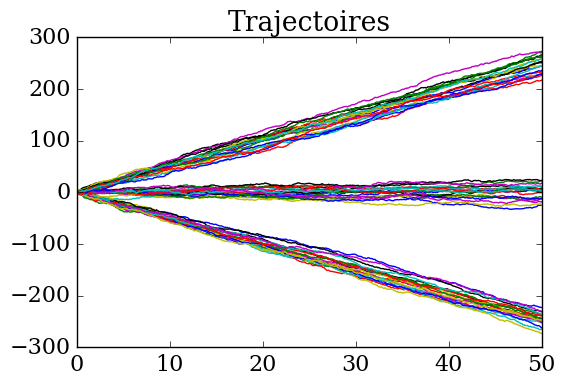

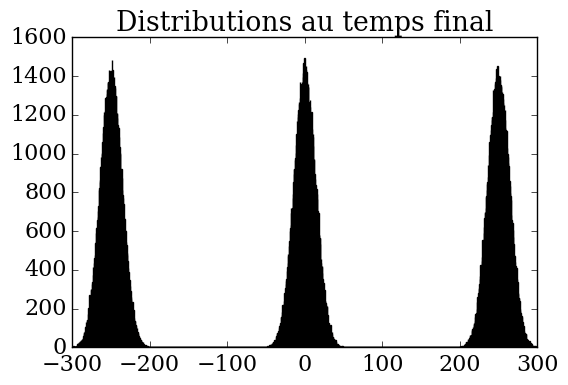

In [17]:
T=50.0
nt=500
dt=T/nt
alpha=2.0

c=[-5,0,5]

for j in range(len(c)):

    t = numpy.arange(0,T+dt,dt)
    x = numpy.empty([nt+1,npart])

    x[0]=x0

    for i in range(nt):
   
            x[i+1]=x[i]+c[j]*dt+numpy.sqrt(2*alpha*dt)*numpy.random.normal(0,1,npart)

    for i in range(20):
        pyplot.figure(1)
        pyplot.title('Trajectoires')
        pyplot.plot(t,x[:,i])
    
    pyplot.figure(2)
    pyplot.title('Distributions au temps final')
    pyplot.hist(x[nt],bins=numpy.arange(-300,300., 0.5),normed=False, color='red');

=> Le terme c.dt peut donc être vu comme un terme de dérive jouant sur toutes les particules de la même manière et n'affectant donc pas la distribution des particules durant leur évolution.

### 2.

- Simulate the following random walk with a 'friction' term:

$$
dx=-\gamma x dt + \sqrt{2\alpha dt}\cal{N(0,1)}
$$

Check that the distribution reaches a steady state for $t\rightarrow \infty$. Can you guess the corresponding equation governing the evolution of the density in this case? What is analytical form for the steady state? These last two questions are not easy!"

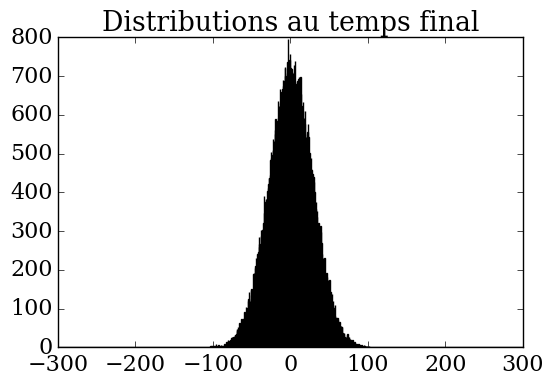

In [18]:
T=200.0
nt=500
dt=T/nt
alpha=2.0

#gamma=0

t = numpy.arange(0,T+dt,dt)
x = numpy.empty([nt+1,npart])

x[0]=x0

for i in range(nt):
   
        x[i+1]=x[i]+numpy.sqrt(2*alpha*dt)*numpy.random.normal(0,1,npart)
    
pyplot.figure(2)
pyplot.title('Distributions au temps final')
pyplot.hist(x[nt],bins=numpy.arange(-300,300., 0.5),normed=False, color='red');

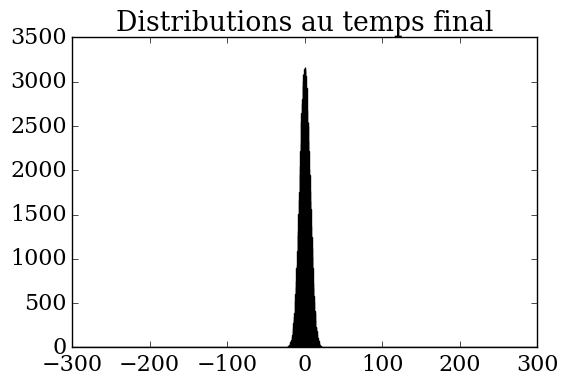

In [19]:
f=-0.05
#gamma = 0.05

t = numpy.arange(0,T+dt,dt)
x = numpy.empty([nt+1,npart])

x[0]=x0

for i in range(nt):
   
        x[i+1]=x[i]+f*x[i]*dt+numpy.sqrt(2*alpha*dt)*numpy.random.normal(0,1,npart)

    
pyplot.figure(2)
pyplot.title('Distributions au temps final')
pyplot.hist(x[nt],bins=numpy.arange(-300,300., 0.5),normed=False, color='red');

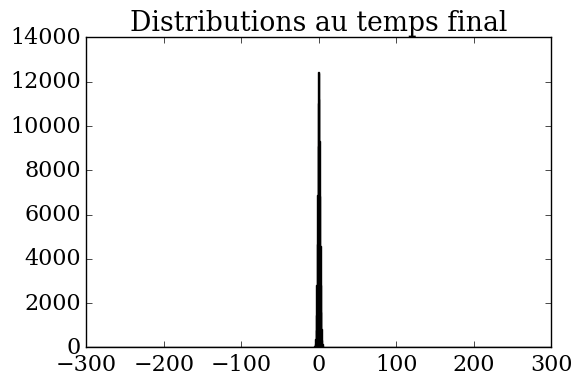

In [20]:
f=-1
#gamma = 1

t = numpy.arange(0,T+dt,dt)
x = numpy.empty([nt+1,npart])

x[0]=x0

for i in range(nt):
   
        x[i+1]=x[i]+f*x[i]*dt+numpy.sqrt(2*alpha*dt)*numpy.random.normal(0,1,npart)
    
pyplot.figure(2)
pyplot.title('Distributions au temps final')
pyplot.hist(x[nt],bins=numpy.arange(-300,300., 0.5),normed=False, color='red');

### Evolution dans le temps

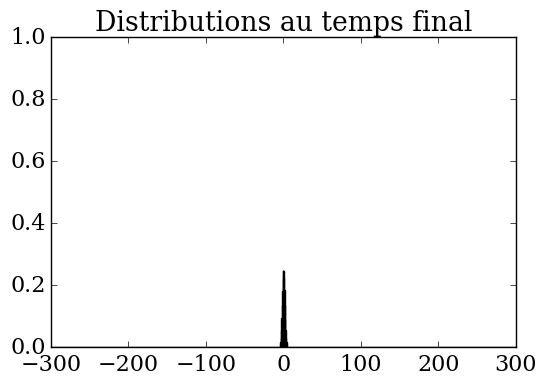

In [21]:
fig = pyplot.figure(figsize=(8,5))
ax = pyplot.axes(xlim=(-10,10), ylim=(0.0,1.1))
line = ax.plot([], [], color='cyan', lw=2)[0]
pyplot.xlabel('x (km)', fontsize=14) #x label
pyplot.ylabel('rho (voitures/km)', fontsize=14) #y label
pyplot.title('Densité du gaz en fonction de la position', y=1.08)
pyplot.close()

fig = pyplot.figure(2)
ax = pyplot.axes(xlim=(-300,300),ylim=(0.0,1.0))
pyplot.title('Distributions au temps final')
pyplot.hist(x[nt],bins=numpy.arange(-300,300., 0.5),normed=True, color='red');

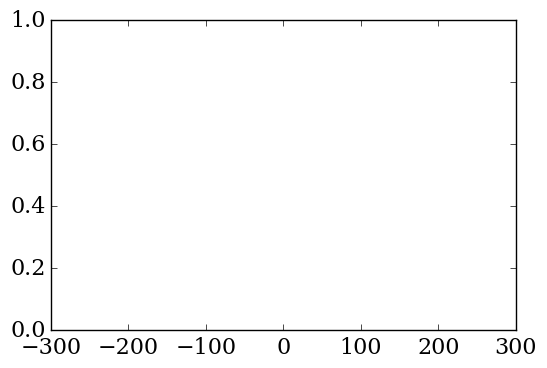

In [22]:
import matplotlib.patches as patches
import matplotlib.path as path
import matplotlib.animation as animation

from IPython.display import HTML

fig = pyplot.figure(2)
ax = pyplot.axes(xlim=(-300,300),ylim=(0.0, 1.0))

    
    
fig, ax = pyplot.subplots()

# histogram our data with numpy
x =numpy.sqrt(2*alpha*dt)*numpy.random.normal(0,1,npart)

n, bins = numpy.histogram(x, 100)

# get the corners of the rectangles for the histogram
left = numpy.array(bins[:-1])
right = numpy.array(bins[1:])
bottom = numpy.zeros(len(left))
top = bottom + n
nrects = len(left)

# here comes the tricky part -- we have to set up the vertex and path
# codes arrays using moveto, lineto and closepoly

# for each rect: 1 for the MOVETO, 3 for the LINETO, 1 for the
# CLOSEPOLY; the vert for the closepoly is ignored but we still need
# it to keep the codes aligned with the vertices
nverts = nrects*(1 + 3 + 1)
verts = numpy.zeros((nverts, 2))
codes = numpy.ones(nverts, int) * path.Path.LINETO
codes[0::5] = path.Path.MOVETO
codes[4::5] = path.Path.CLOSEPOLY
verts[0::5, 0] = left
verts[0::5, 1] = bottom
verts[1::5, 0] = left
verts[1::5, 1] = top
verts[2::5, 0] = right
verts[2::5, 1] = top
verts[3::5, 0] = right
verts[3::5, 1] = bottom

barpath = path.Path(verts, codes)
patch = patches.PathPatch(
    barpath, facecolor='green', edgecolor='yellow', alpha=0.5)
ax.add_patch(patch)

ax.set_xlim(-300, 300)
ax.set_ylim(0.0, 1.0)

f=-0.1
x = numpy.zeros([npart])
    
def animate(i):
    global x
    y=x.copy() #on conserve ici la valeur du temps précédent
    
    y=x+f*x*dt+numpy.sqrt(2*alpha*dt)*numpy.random.normal(0,1,npart)
    x=y.copy()
    n, bins = numpy.histogram(x, 100)
    top = bottom + n
    verts[1::5, 1] = top
    verts[2::5, 1] = top
    return [patch, ]

ani = animation.FuncAnimation(fig, animate, 100, repeat=False, blit=True)
pyplot.close()
HTML(ani.to_html5_video())

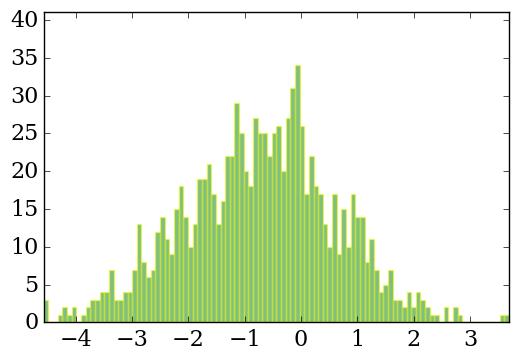

In [23]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.path as path
import matplotlib.animation as animation

from IPython.display import HTML
fig, ax = plt.subplots()

# histogram our data with numpy
data = np.random.randn(1000)
n, bins = np.histogram(data, 100)

# get the corners of the rectangles for the histogram
left = np.array(bins[:-1])
right = np.array(bins[1:])
bottom = np.zeros(len(left))
top = bottom + n
nrects = len(left)

# here comes the tricky part -- we have to set up the vertex and path
# codes arrays using moveto, lineto and closepoly

# for each rect: 1 for the MOVETO, 3 for the LINETO, 1 for the
# CLOSEPOLY; the vert for the closepoly is ignored but we still need
# it to keep the codes aligned with the vertices
nverts = nrects*(1 + 3 + 1)
verts = np.zeros((nverts, 2))
codes = np.ones(nverts, int) * path.Path.LINETO
codes[0::5] = path.Path.MOVETO
codes[4::5] = path.Path.CLOSEPOLY
verts[0::5, 0] = left
verts[0::5, 1] = bottom
verts[1::5, 0] = left
verts[1::5, 1] = top
verts[2::5, 0] = right
verts[2::5, 1] = top
verts[3::5, 0] = right
verts[3::5, 1] = bottom

barpath = path.Path(verts, codes)
patch = patches.PathPatch(
    barpath, facecolor='green', edgecolor='yellow', alpha=0.5)
ax.add_patch(patch)

ax.set_xlim(left[0], right[-1])
ax.set_ylim(bottom.min(), top.max())


def animate(i):
    # simulate new data coming in
    data = np.random.randn(1000)
    n, bins = np.histogram(data, 100)
    top = bottom + n
    verts[1::5, 1] = top
    verts[2::5, 1] = top
    return [patch, ]

ani = animation.FuncAnimation(fig, animate, 100, repeat=False, blit=True)
plt.show()
HTML(ani.to_html5_video())

## Challenge 3: Modèle d'Ising
Partie 1:
- Check that this is not a coincidence and try again for different lattice configurations. You may use the following routine to generate different ones with random initial dipole orientations.

Partie 2:
- Perform a series of runs with $\alpha \in [0 1]$ and plot the average energy of the system and its magnetisation as a function of $\alpha$. Estimate the critical value of $\alpha$ at which the phase transition occurs. Is it compatible with Onsager's exact solution for the system?
- Redo the analysis with a different set of boundary conditions for the lattice and a different initial lattice configuration. For example, you could assume that on the borders all the spins are pointing upwards on the borders while they are randomly oriented in the bulk.

In [24]:
import matplotlib.cm as cm
from JSAnimation.IPython_display import display_animation

In [25]:
def initial_state(nx,ny):
    """ Creates a lattice with random spin orientations
   
    Parameters:
    ----------
    nx   : int
        Discretization points in x
    ny   : int
        Discretization points in y
   
    Returns:
    -------
    r: 2D array of spins
    """
       
    # Uniform random spins between 0 and 1  
    r = numpy.random.randint(0,2,(nx,ny))
    
    # Where r=0, we assign a negative spin
    r[r==0] =-1

    return r

In [26]:
def energy_at_site(sp,alpha,sigma,ix,iy):
    """ Computes the contribution to the energy for a given spin
    at location ix,iy for a lattice with periodic boundary conditions
   
    Parameters:
    ----------
    sp: numpy array
        array of spins
    alpha  : real
        coupling constant J/(kb*T)
    sigma   : int
        spin at site ix,iy
    ix   : int
        location in x
    iy   : int
        location in y
    
   
    Returns:
    -------
    energy: energy for the given configuration
    """
    
    energy=-alpha*sigma*(sp[(ix-1)%nx,iy]+sp[(ix+1)%nx,iy]+sp[ix,(iy-1)%ny]+sp[ix,(iy+1)%ny])

    return energy

In [27]:
def metropolis_at_site(sp,alpha,ix,iy):
    """ Flips a dipole at site ix, iy when probability condition is met 
   
    Parameters:
    ----------
    sp: numpy array
        array of spins
    alpha  : real
        coupling constant J/(kb*T)
    ix   : int
        location in x
    iy   : int
        location in y
    """
    sigma=sp[ix,iy]
    energy_before_flip = energy_at_site(sp,alpha,sigma,ix,iy)
    sigma = -sigma
    energy_if_site_flipped = energy_at_site(sp,alpha,sigma,ix,iy)
    
    # Flip the site with Metropolis probability
    # Condition is always satisifed if dE < 0
    if (numpy.random.random_sample()<numpy.exp(-(energy_if_site_flipped \
                                               -energy_before_flip))):
        sp[ix,iy]=-sp[ix,iy]

Dans la cellule suivante, on effectue la méthode en partant à chaque fois d'un état initial différent. Suivant cet état initial, le résultat attendu est différent. Nous renvoyons la valeur calculée par la méthode ainsi que la valeur théorique et le delta correspondant. Il y a en fait cinq cas possible repris ci-dessous en fonction de la distribution initiale.

In [28]:
nx=10
ny=10

# Non-dimensional coupling constant J/(kb*T)
alpha = 0.1

def get_updown_ratio() :
    
    # Initial spins at each site
    sp = initial_state(nx,ny)
    #pyplot.figure(figsize=(4,4))
    #pyplot.imshow(sp,interpolation="none",origin='lower')


    NMC = 100000
    states = numpy.empty(NMC+1)
    states[0]=sp[5,5]

    for n in range(0,NMC):
        metropolis_at_site(sp,alpha,5,5)
        states[n]=sp[5,5]

    ups = numpy.extract(states==1, states).size
    downs = NMC - ups
    delta=energy_at_site(sp,alpha,-1,5,5)-energy_at_site(sp,alpha,1,5,5)
    
    
    
    return (ups/downs, numpy.exp(delta))
    


Spins entourant la case (5,5):
- 4 rouges 0 bleu => $\frac{p({\rm up})}{p({\rm downs})} = e^{-\Delta E}=e^{0.8}\approx 2.22$
- 3 rouges 1 bleu => $\frac{p({\rm up})}{p({\rm downs})} = e^{-\Delta E}=e^{0.4}\approx 1.49$
- 2 rouges 2 bleus => $\frac{p({\rm up})}{p({\rm downs})} = e^{-\Delta E}=e^{0.0}=1.0$
- 1 rouge 3 bleus => $\frac{p({\rm up})}{p({\rm downs})} = e^{-\Delta E}=e^{-0.4}\approx 0.67$
- 0 rouge 4 bleus => $\frac{p({\rm up})}{p({\rm downs})} = e^{-\Delta E}=e^{-0.8}\approx 0.45$


Ci-dessous, nous exécutons get_updown_ratio() plusieurs fois jusqu'à obtenir tous les cas possibles et vérifier la correspondance.

Le temps d'exécution de cette cellule varie car le temps écoulé avant l'obtention d'une combinaison inédite parmi les cinq est variable et la probabilité d'obtention d'une des cinq combinaisons diffère selon la combinaison.

In [29]:
a = numpy.zeros(5)
c = numpy.zeros(5)
i=0
while (a[4]==0) : 
    b = get_updown_ratio()
     
    if b[1] in a :
        e=0
    else :
        
        a[i]=b[1]
        c[i]=b[0]
        
        i+=1
print ('exp (- ΔE ) =',a)
print ('taux de haut/bas = ',c)
print ('')
print('différence entre le taux obtenu et exp (- ΔE ) =', abs(a-c))


exp (- ΔE ) = [ 0.44932896  1.          1.4918247   2.22554093  0.67032005]
taux de haut/bas =  [ 0.44881342  1.          1.4970036   2.24012572  0.66930974]

différence entre le taux obtenu et exp (- ΔE ) = [ 0.00051554  0.          0.0051789   0.01458479  0.00101031]



On observe bien que la méthode métropolis donne un résultat cohérent quel que soit l'état initial de distribution des spins.

 #### Partie 2
 On initialise le réseau avec tout les spins up (rouge)

In [30]:
nx=100
ny=100
NMC=100

In [31]:
def ising_model_metropolis(sp, NMC, nx, ny, alpha):
    """ Creates a sequence of states for the Ising model using
    the Metropolis algorithm
   
    Parameters:
    ----------
    sp   : initial lattice state
    nx   : int
        Discretization points in x
    ny   : int
        Discretization points in y
    NMC  : int
        Number of states to create
    alpha  : real
        coupling constant J/(kb*T)
    Returns:
    -------
    states: sequence of states
    """
    states = numpy.empty([NMC+1,nx,ny])
    states[0] = sp.copy()
    
    for i in range(1,NMC+1):
        for j in range(0,nx*ny):
            ix=numpy.random.randint(0,nx)
            iy=numpy.random.randint(0,ny)
            metropolis_at_site(sp,alpha,ix,iy)
        states[i]=sp.copy()
    return states


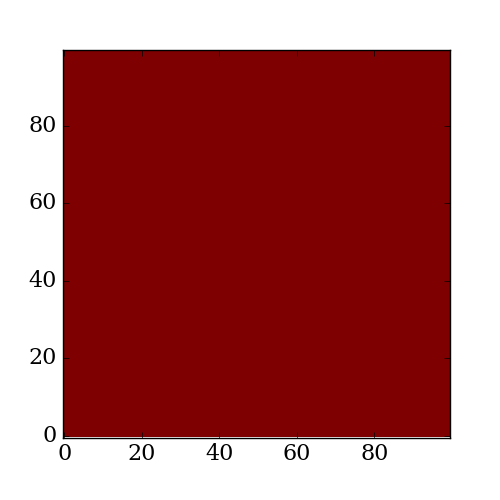
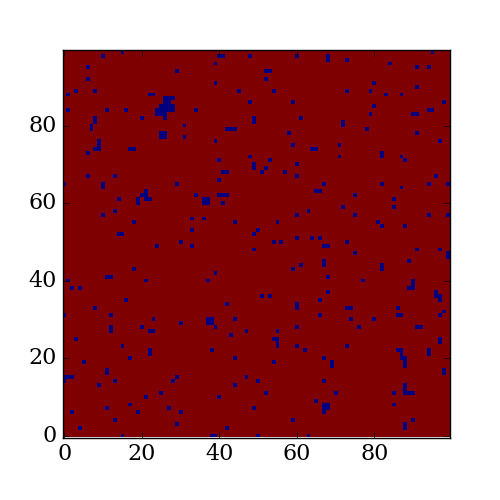
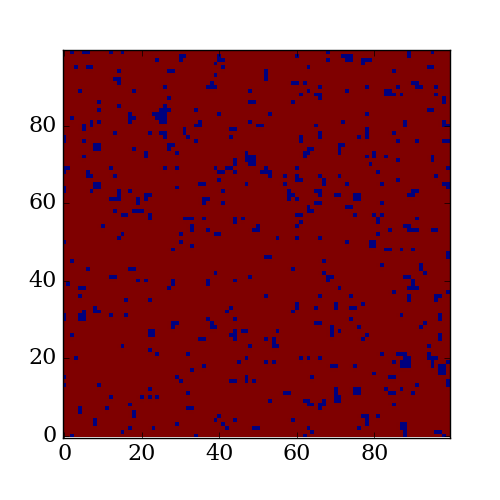
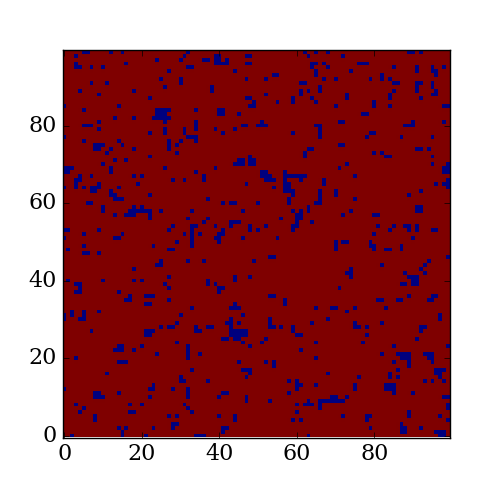
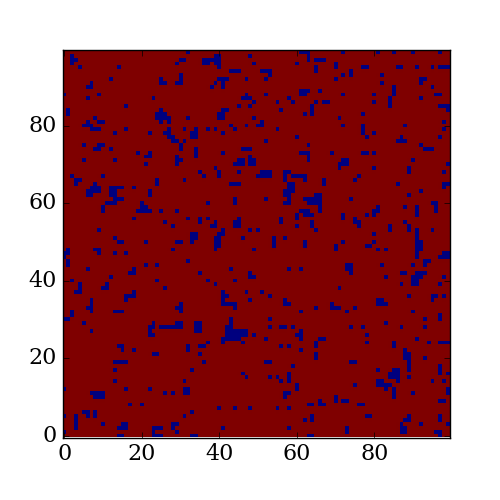
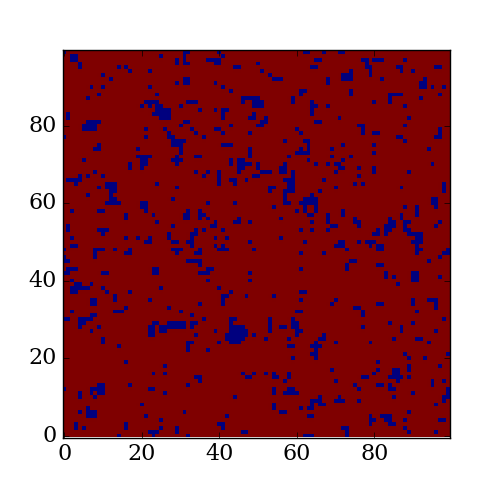
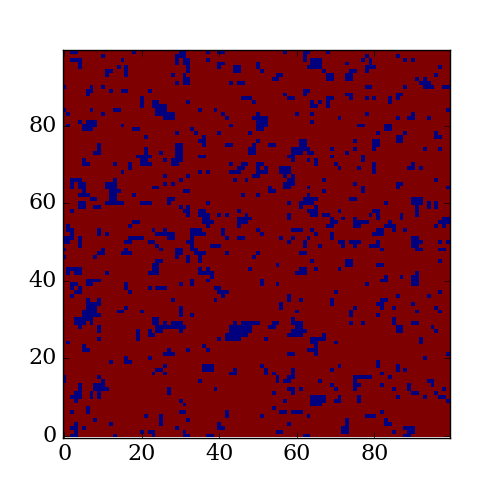
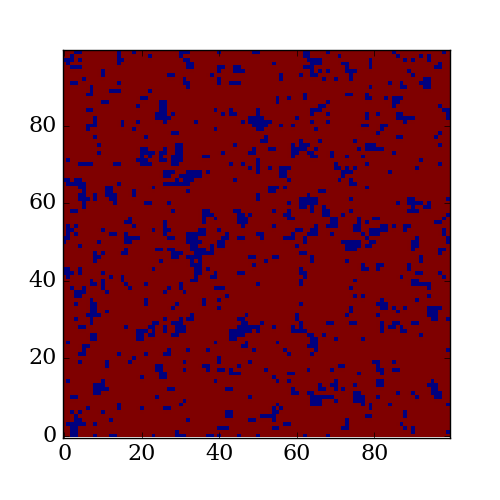
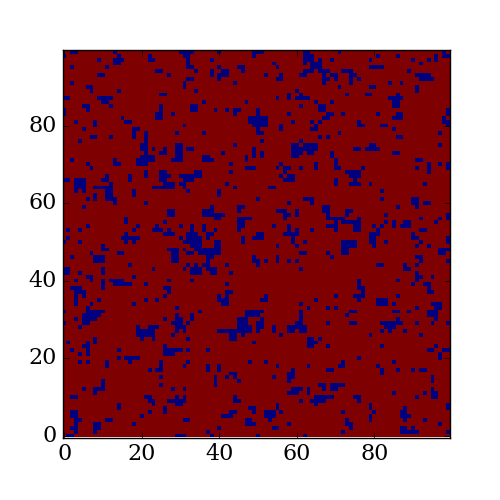
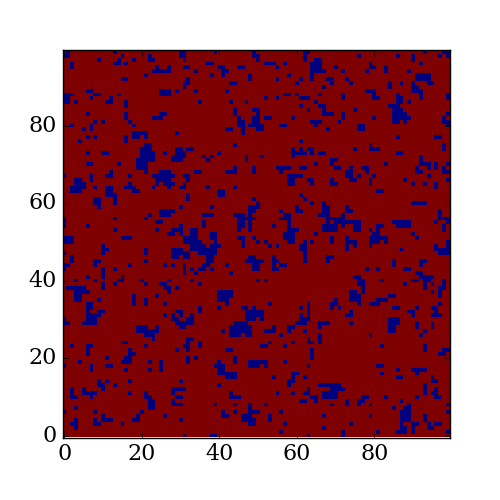
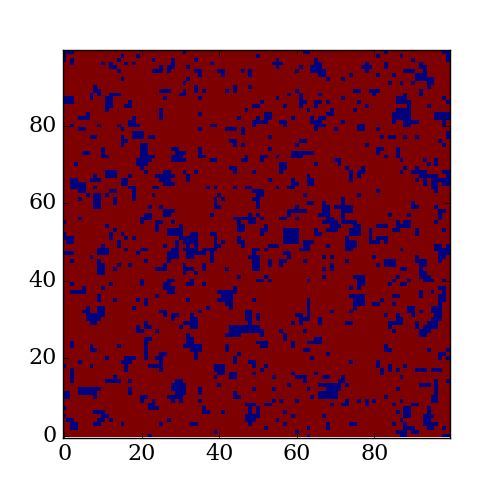
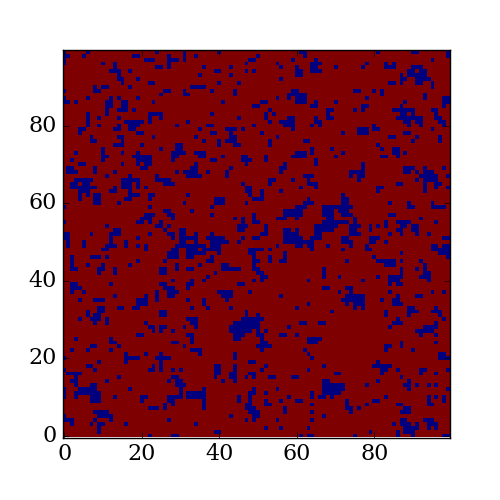
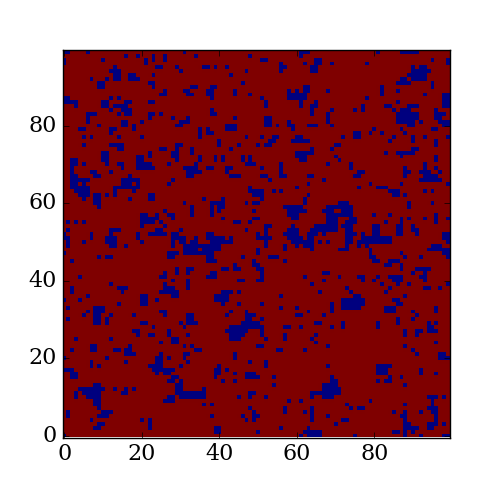
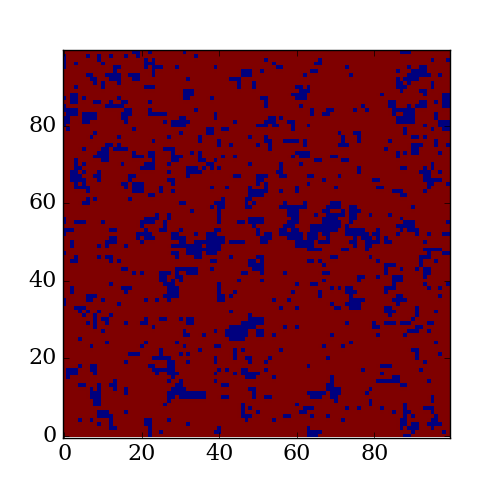
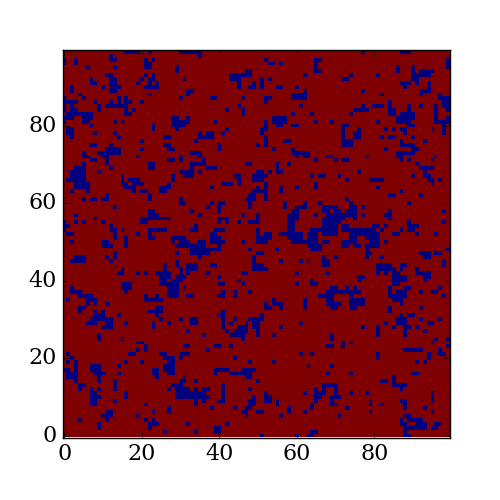
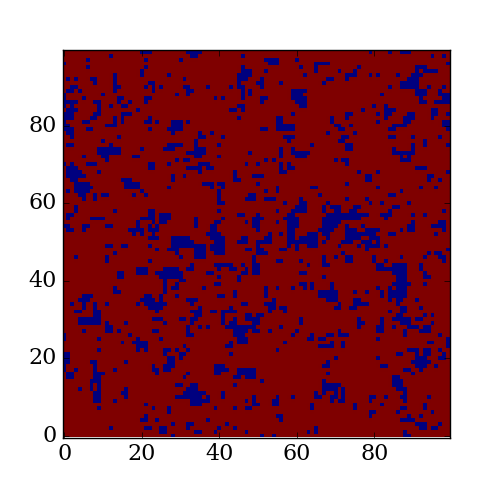
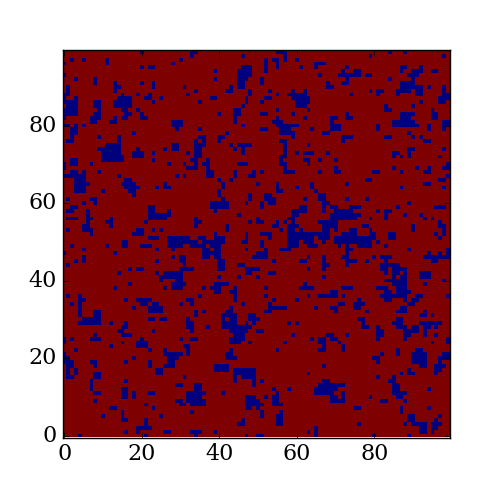
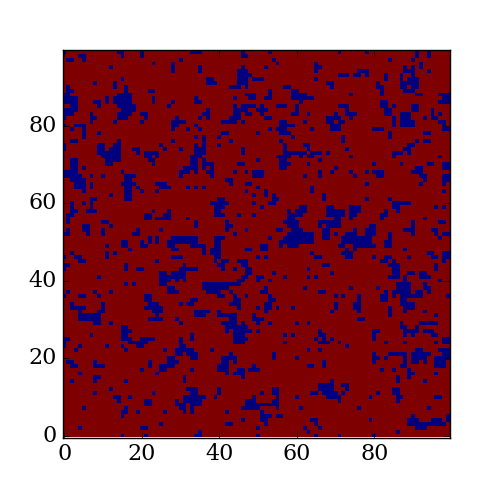
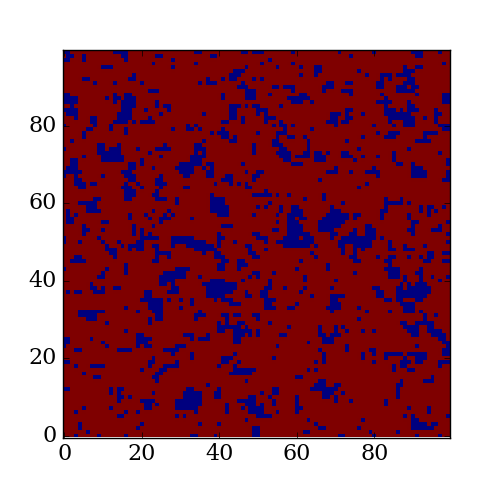
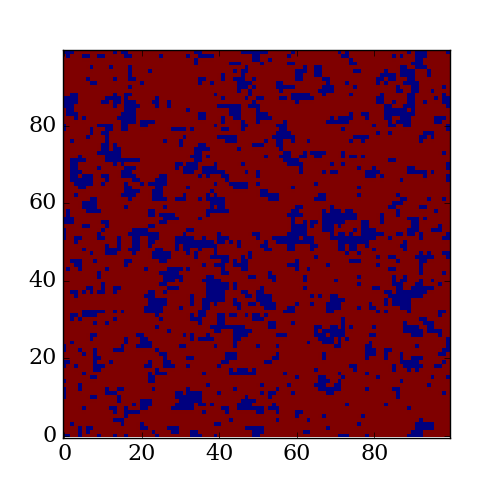
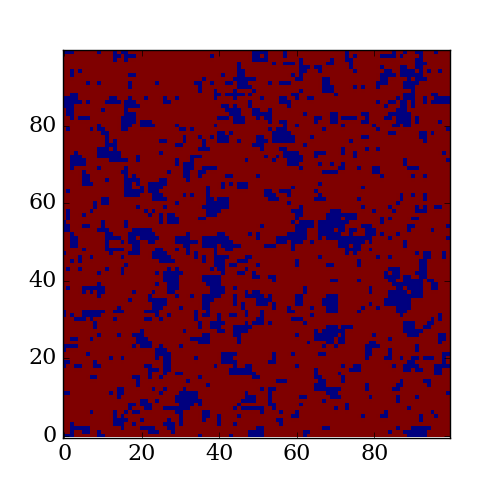
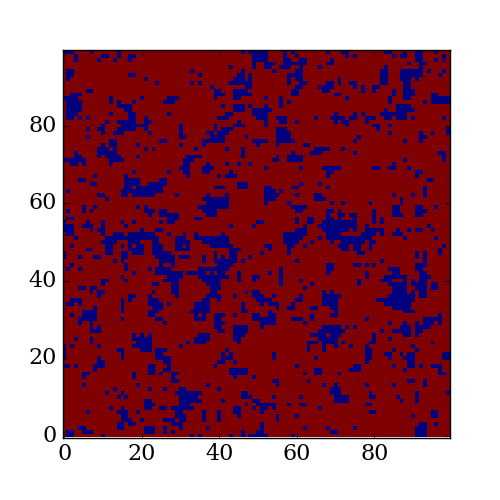
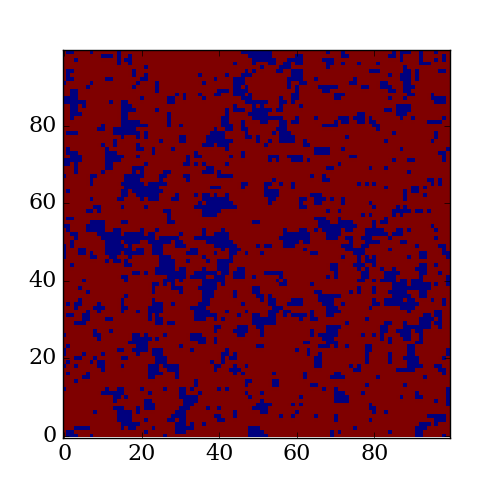
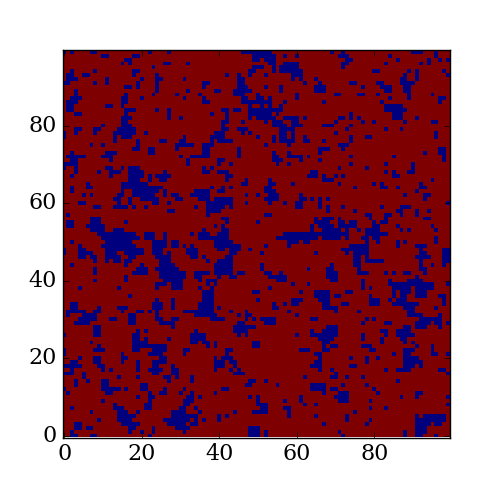
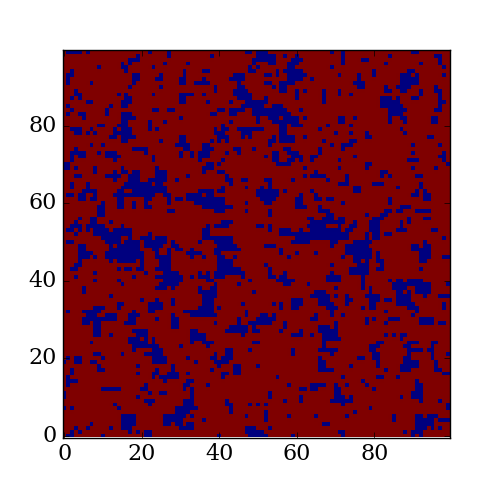
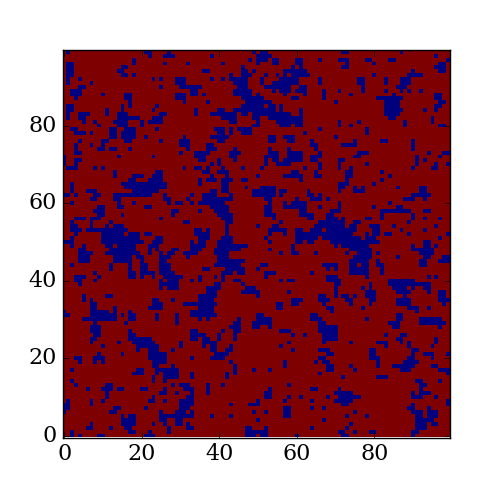
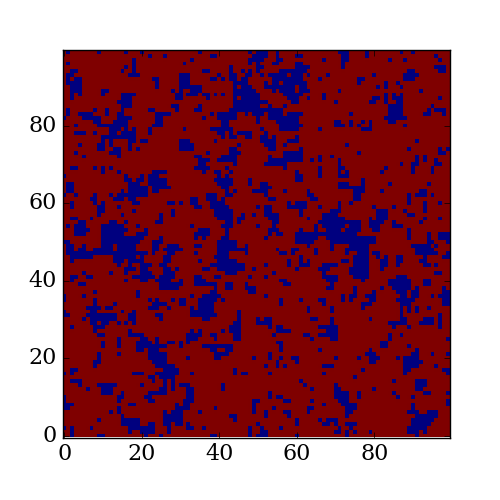
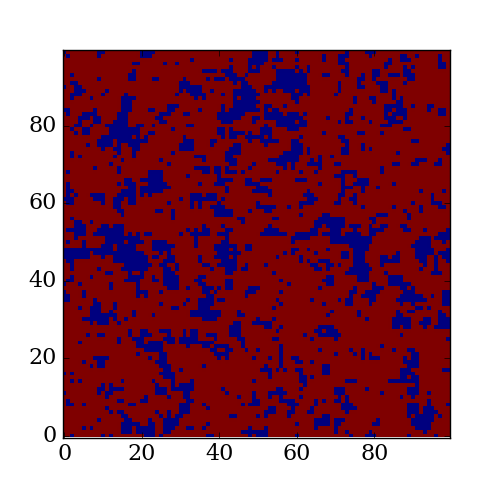
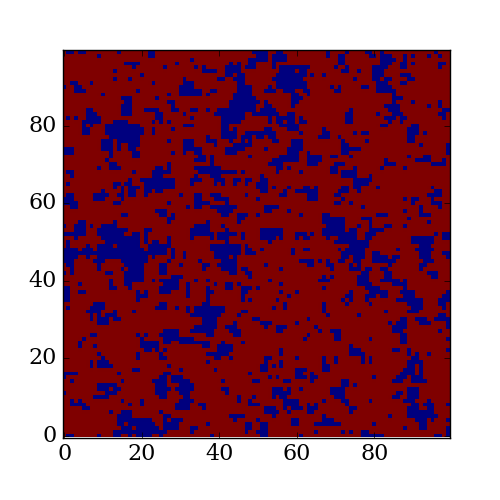
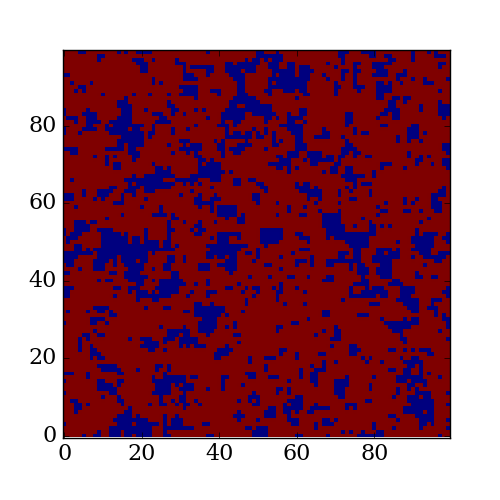
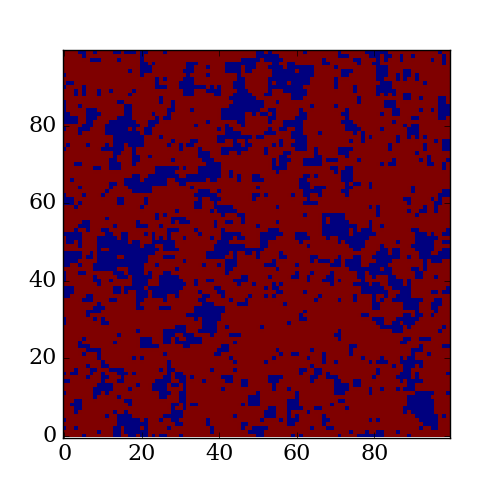
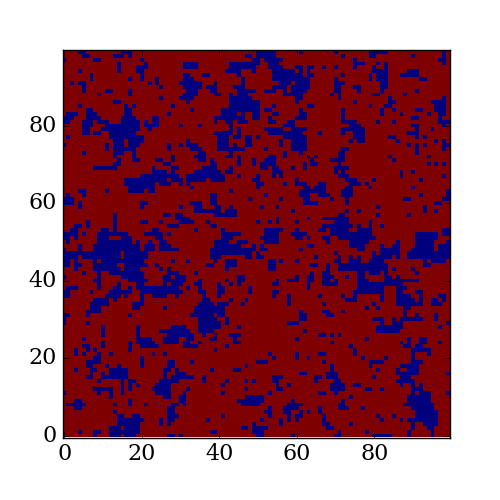
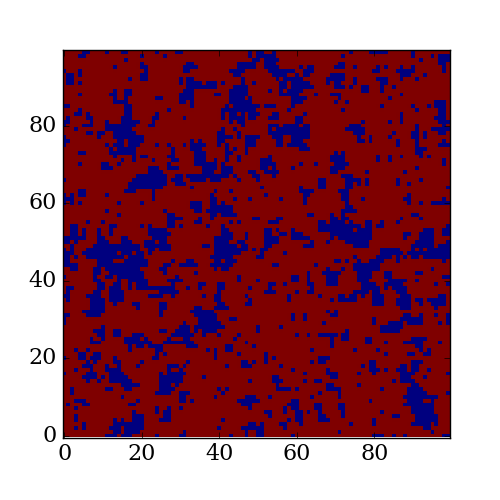
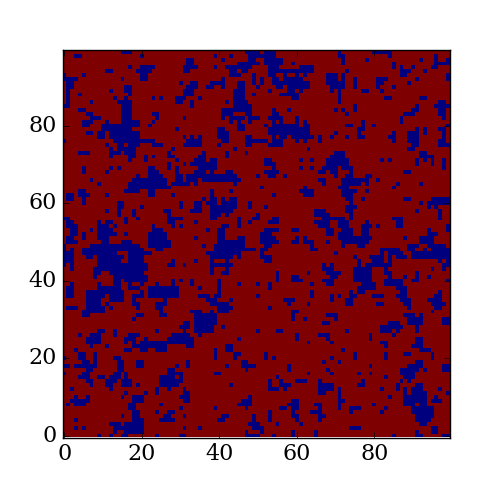
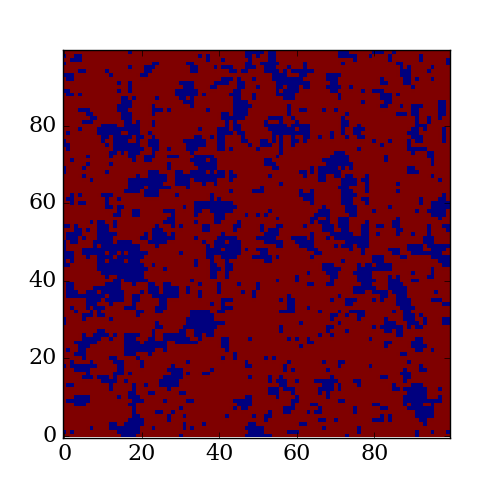
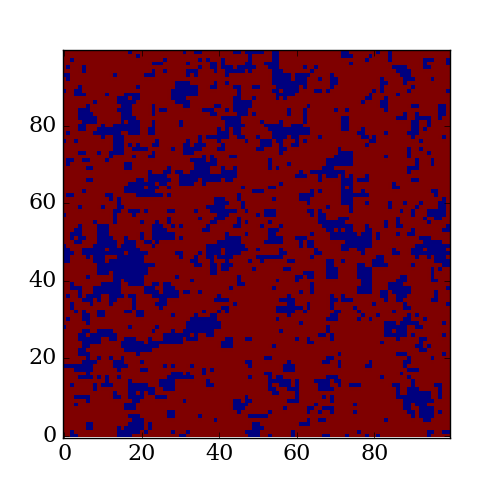
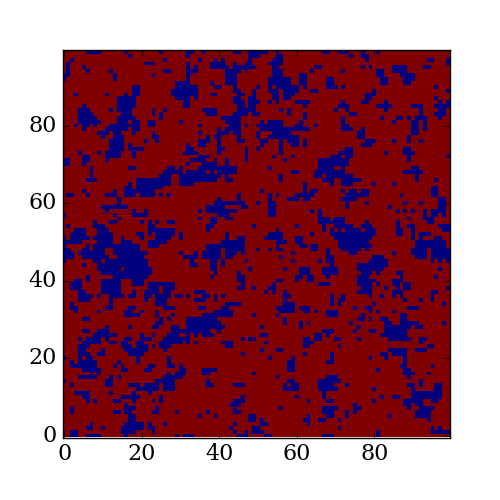
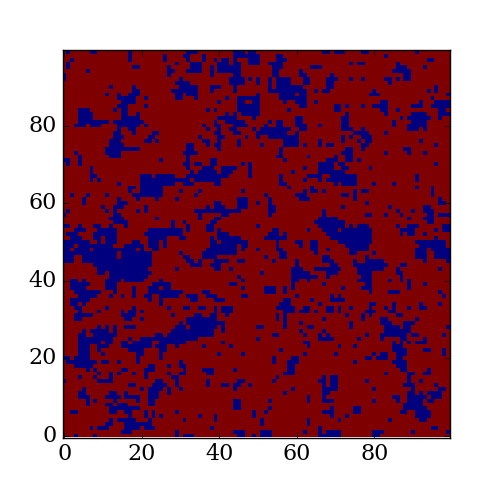
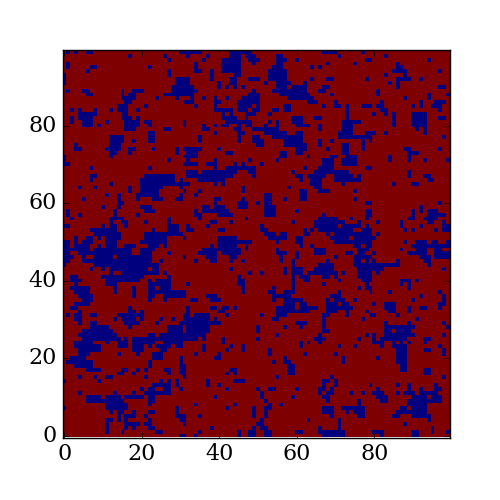
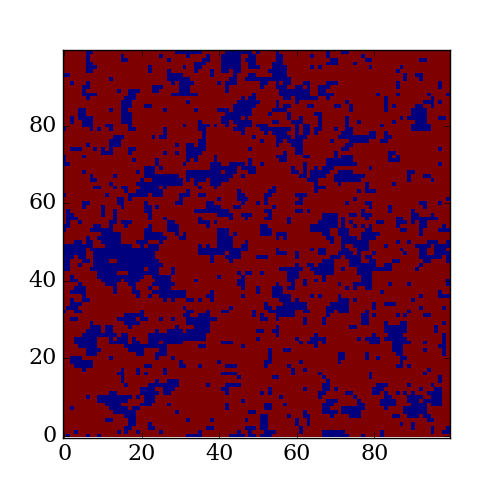
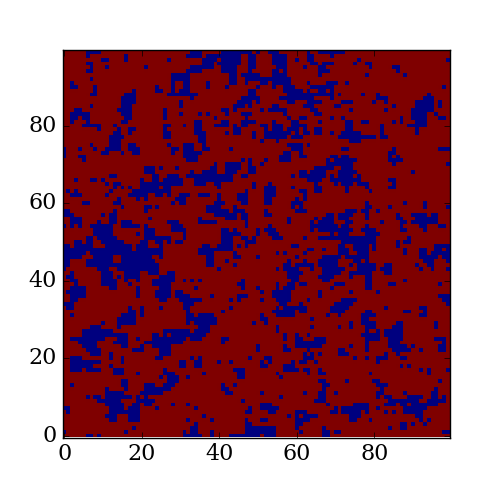
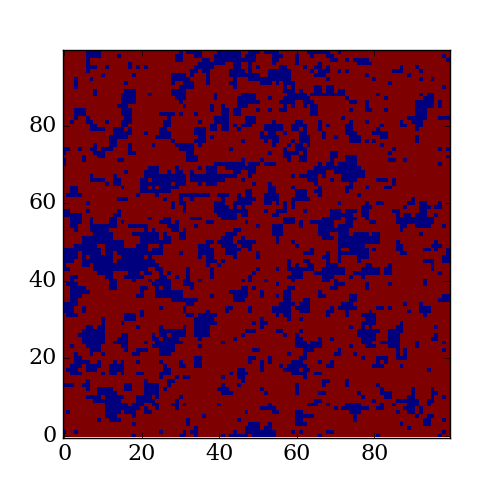
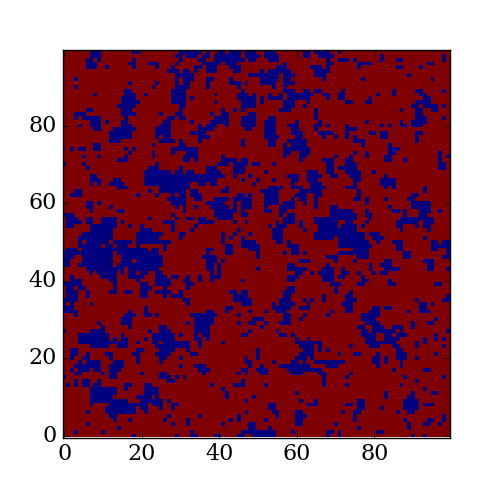
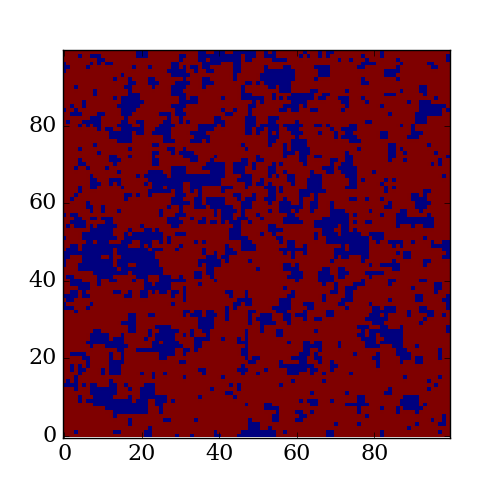
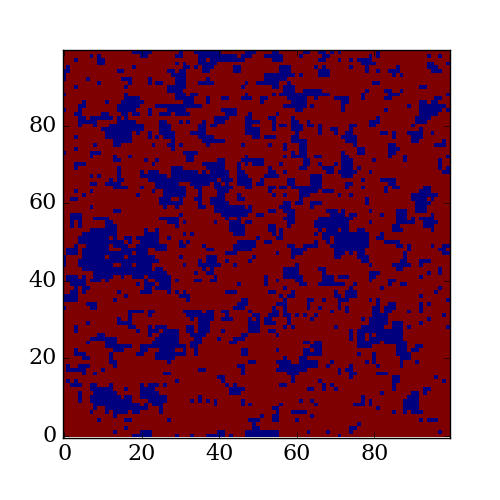
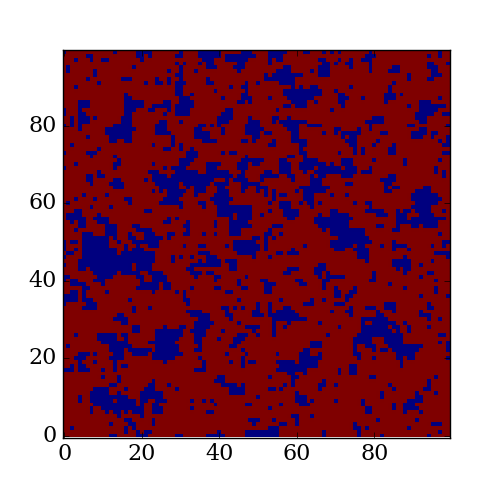
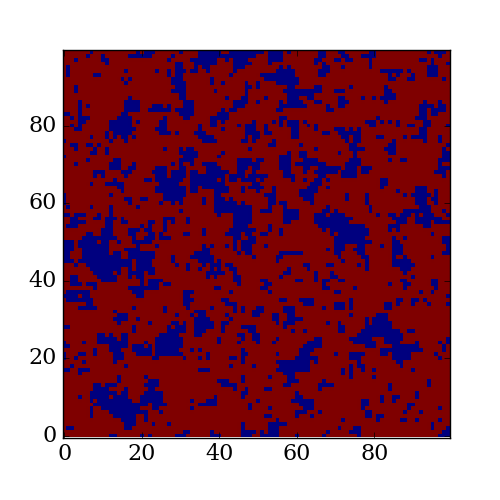
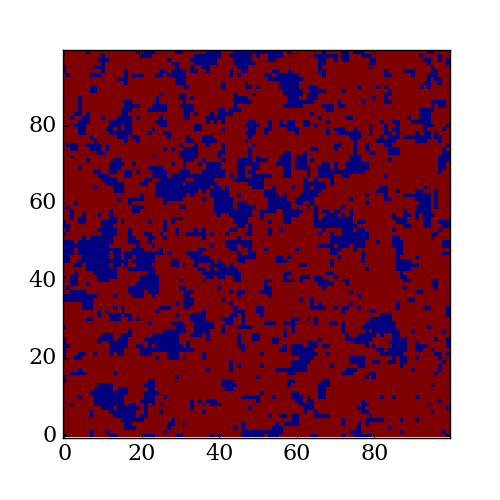
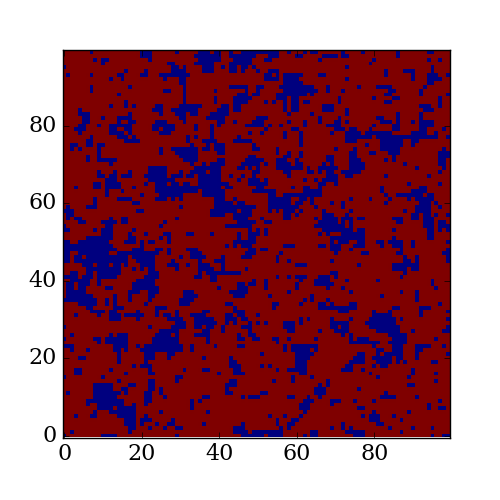
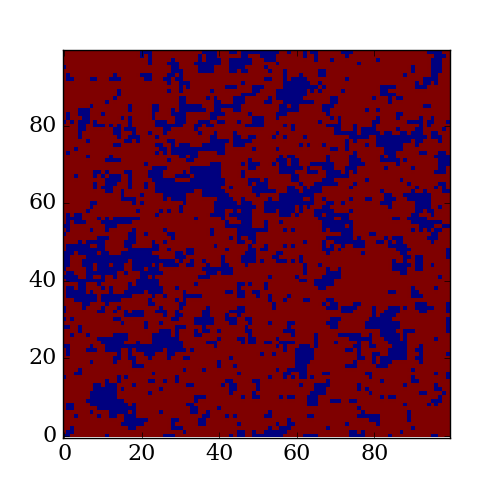
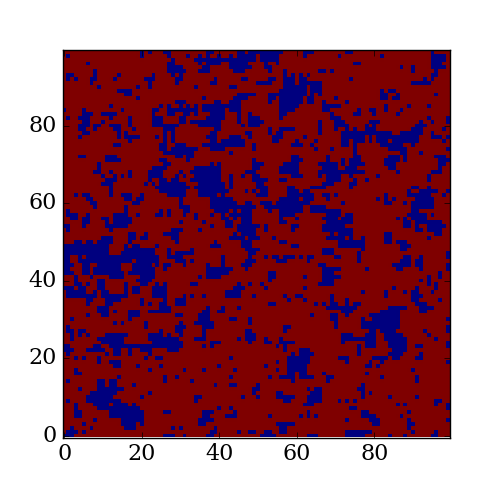
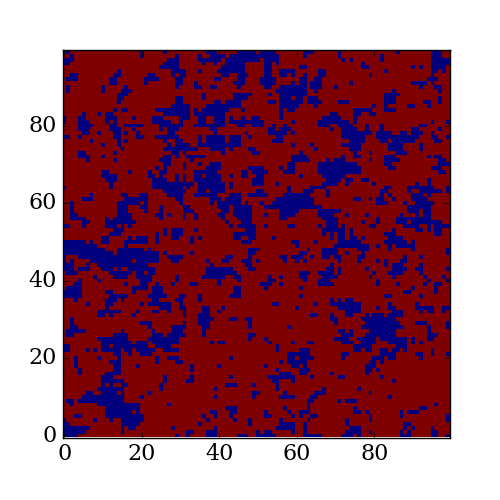
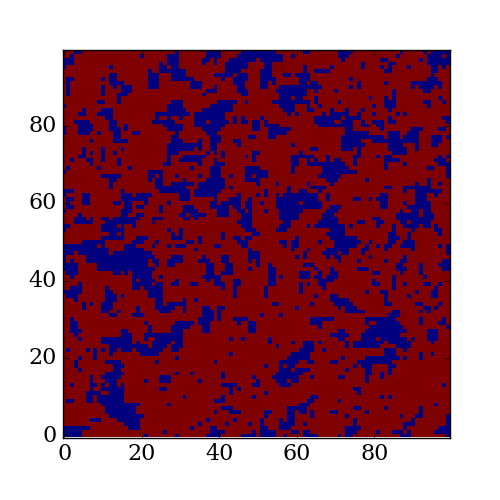
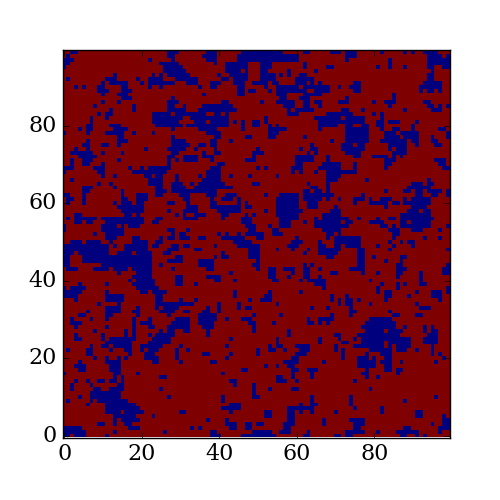
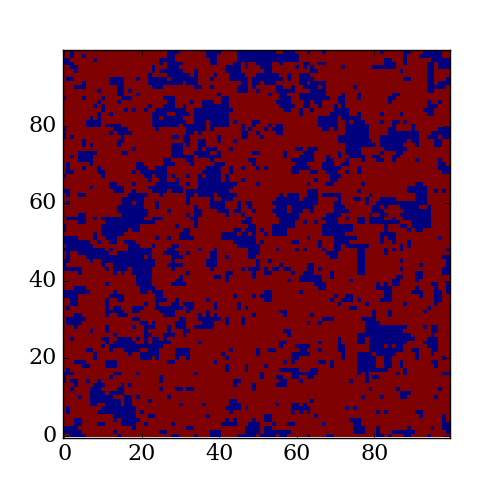
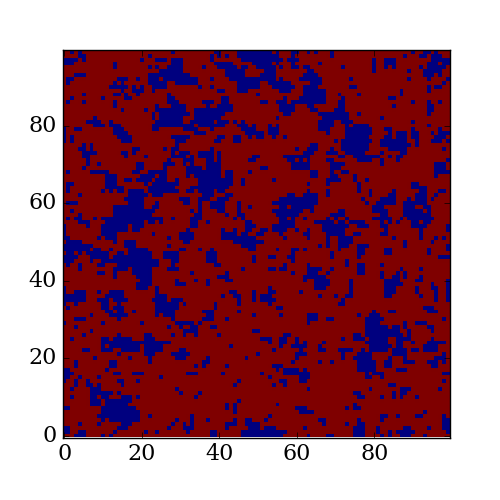
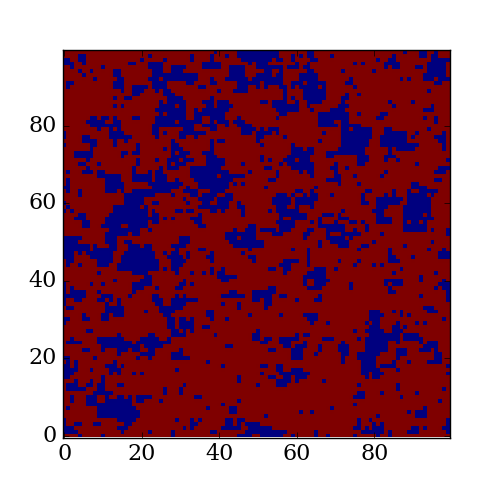
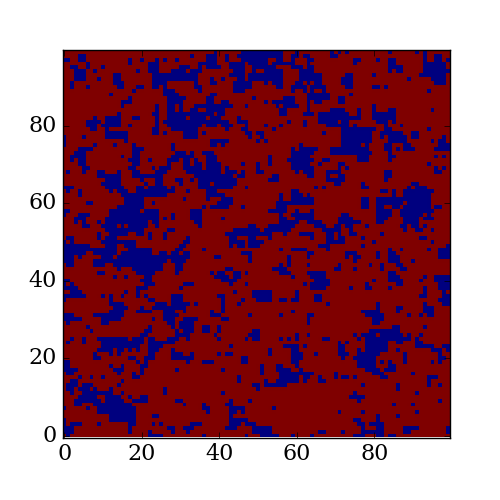
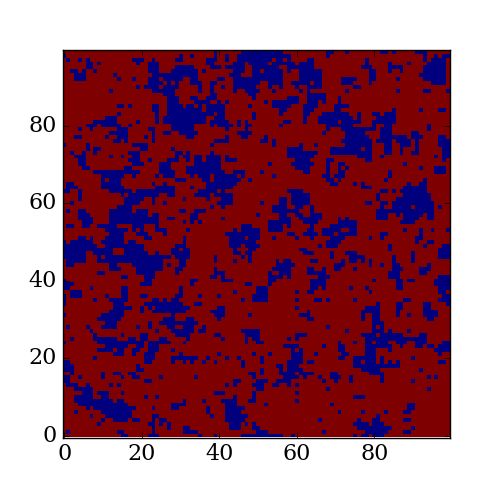
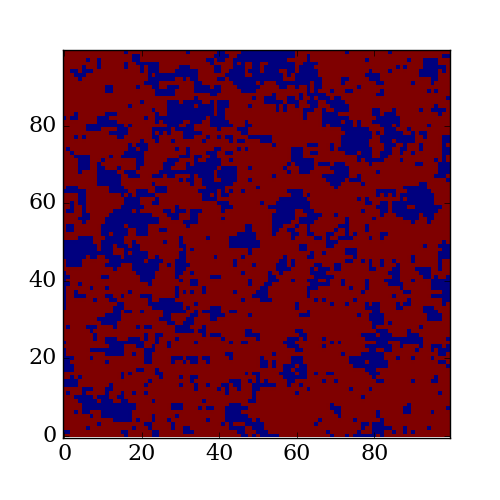
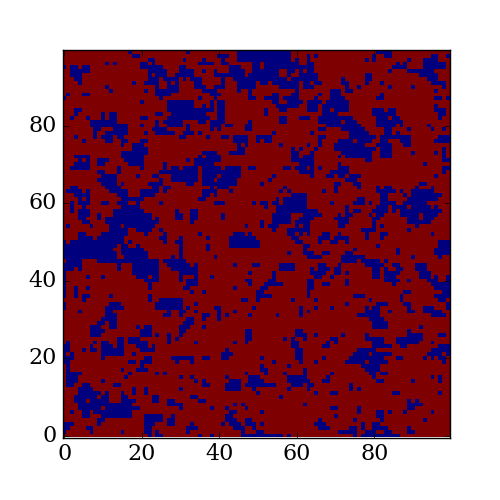
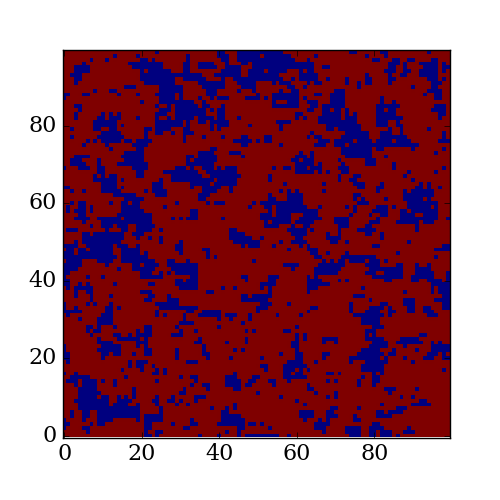
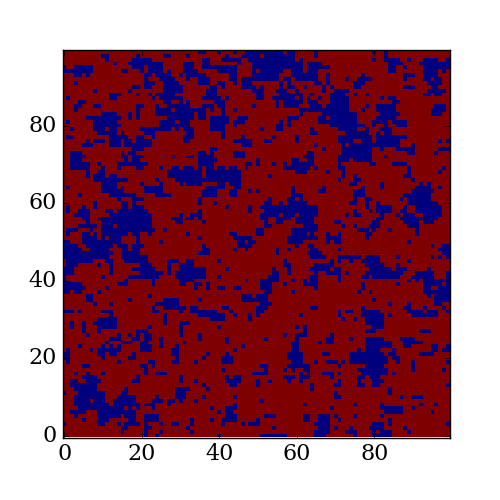
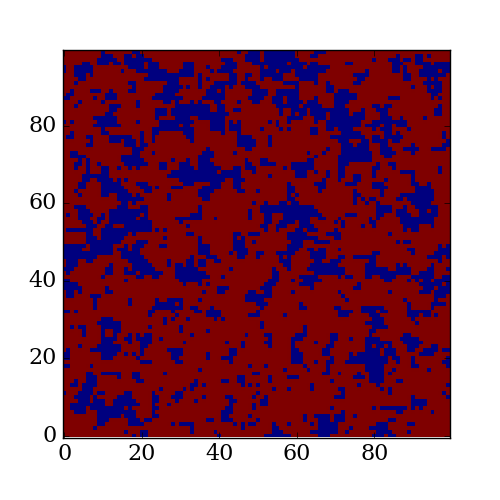
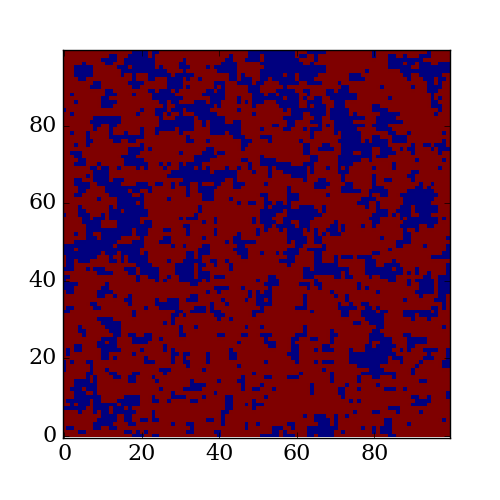
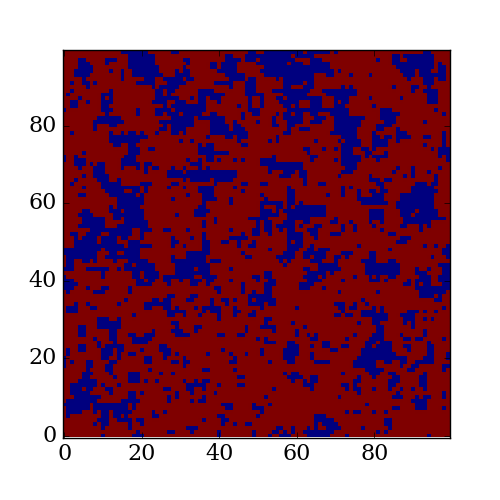
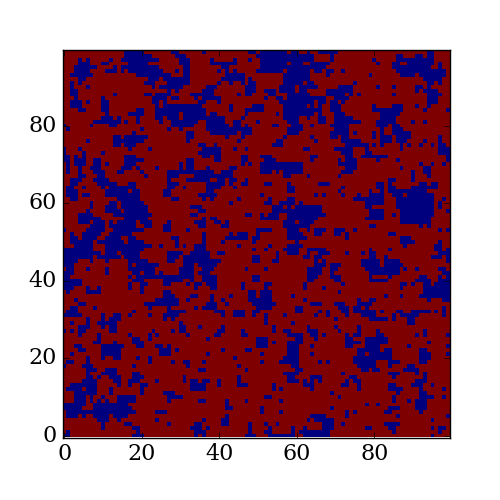
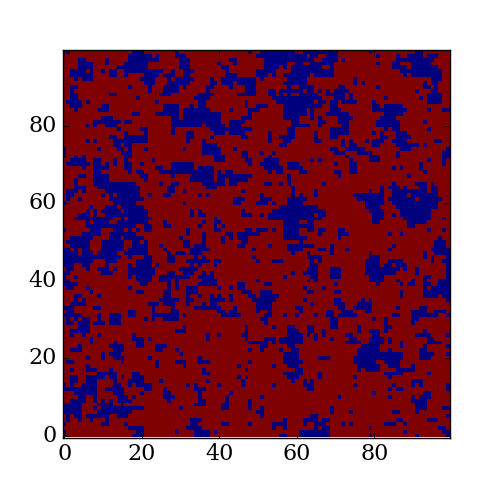
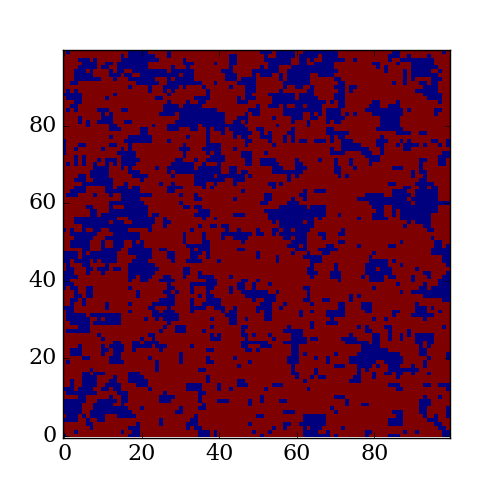
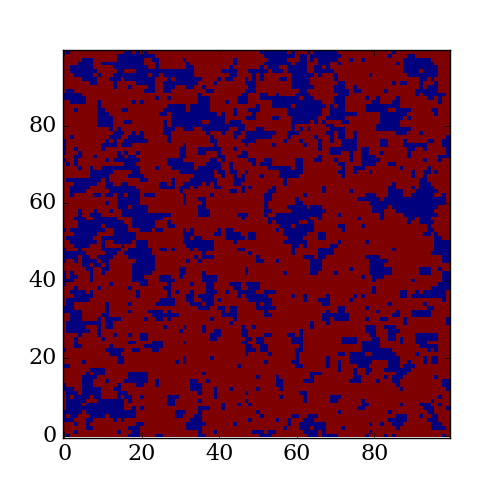
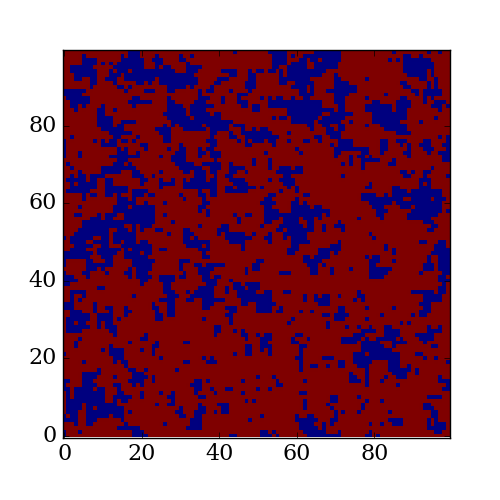
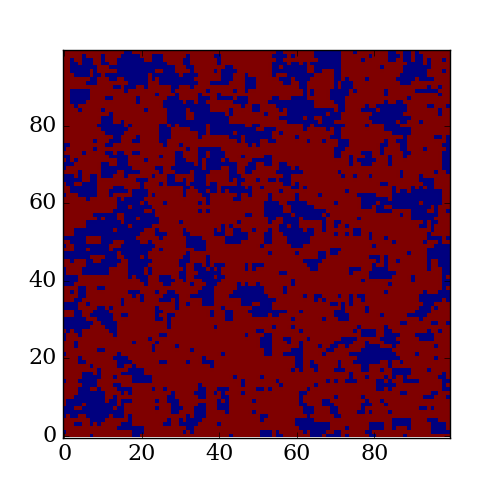
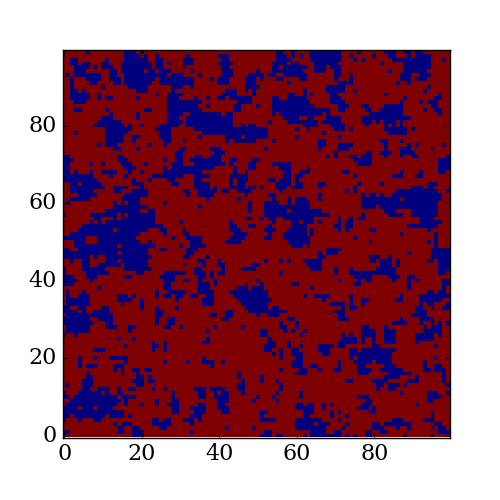
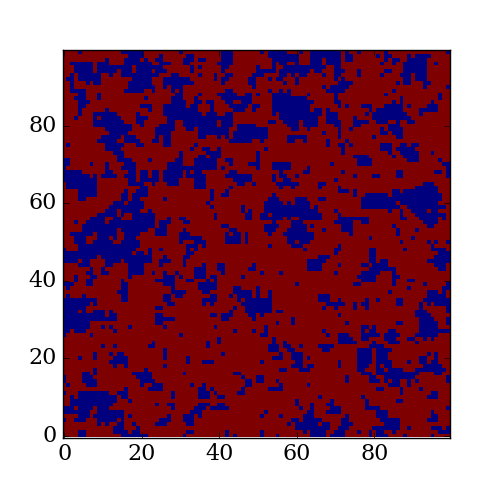
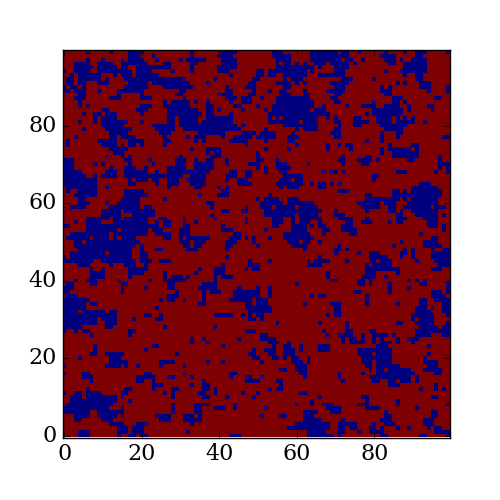
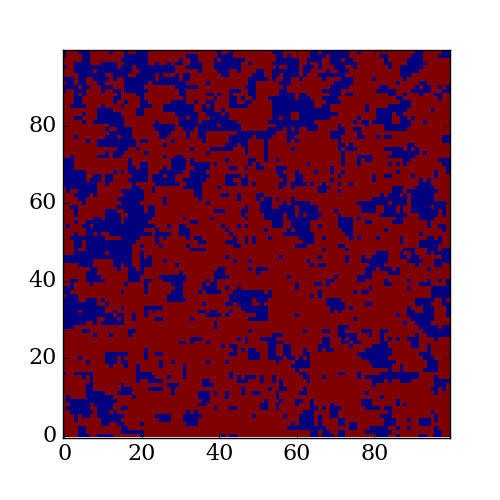
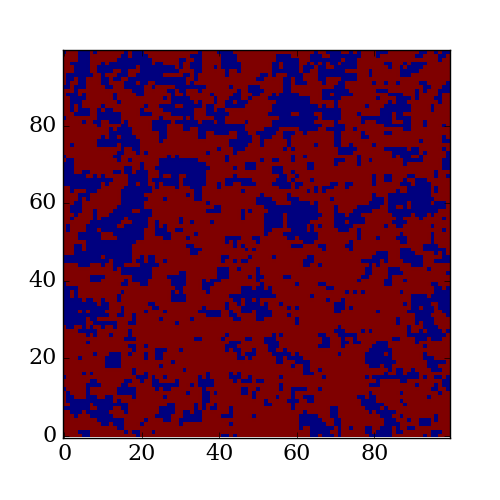
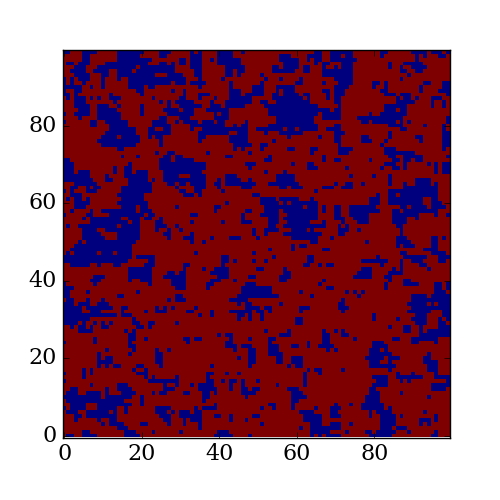
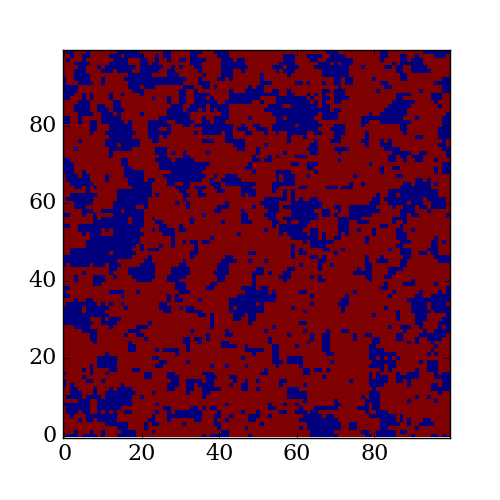
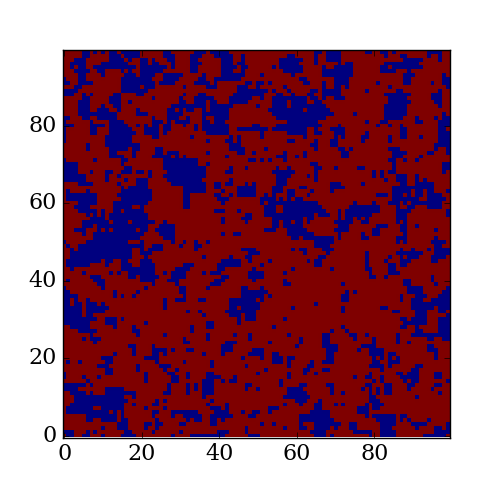
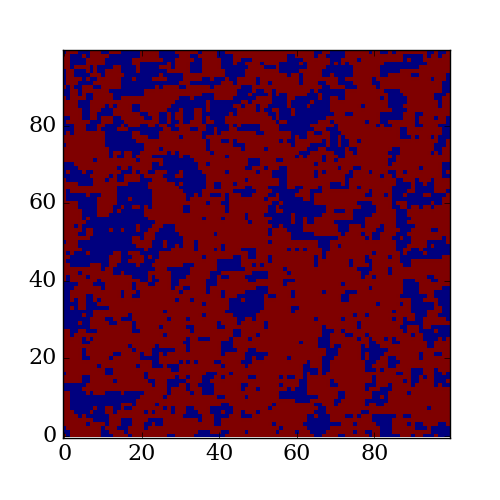
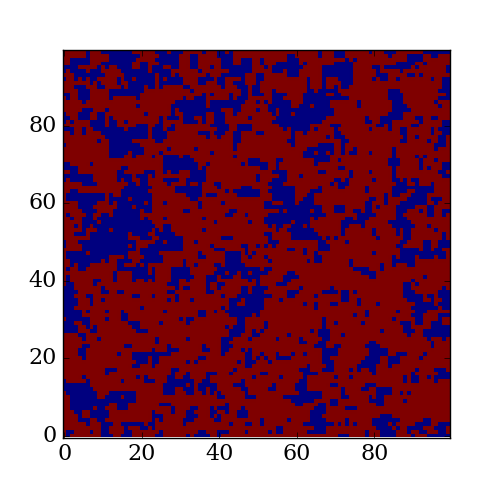
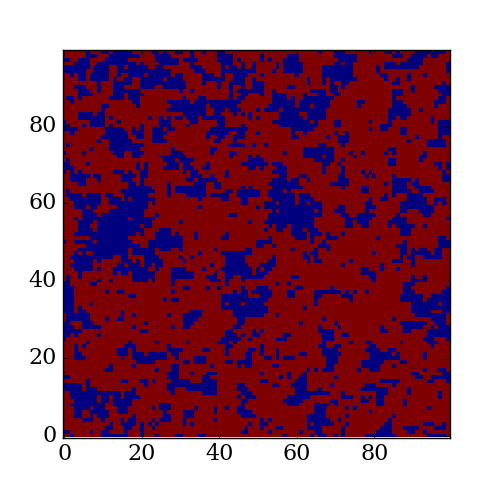
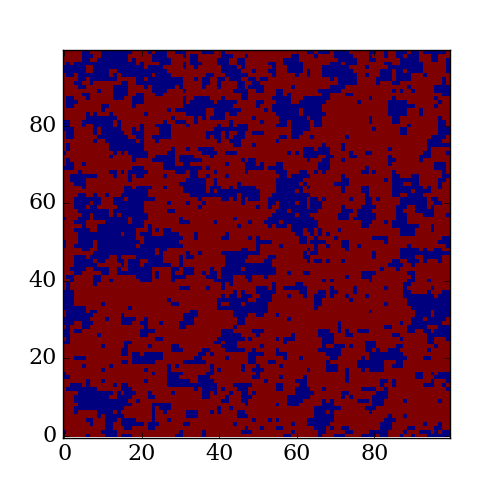
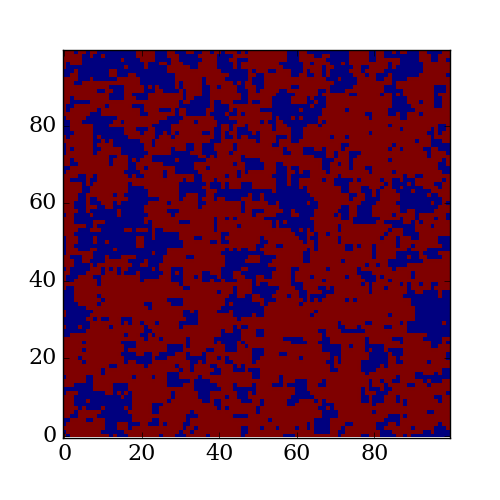
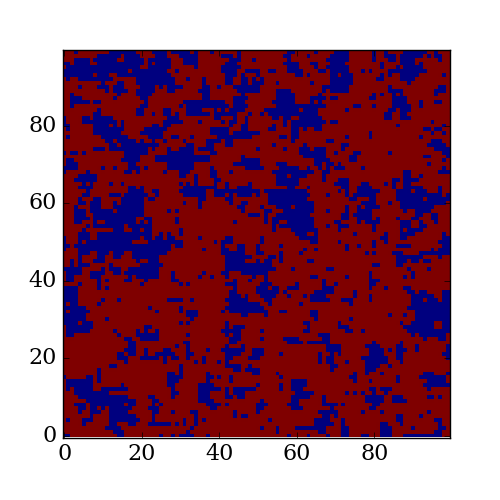
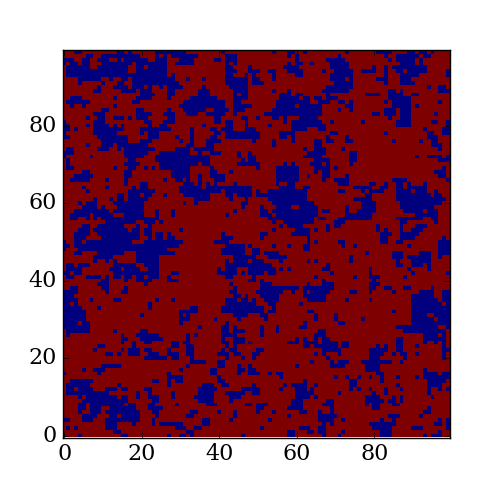
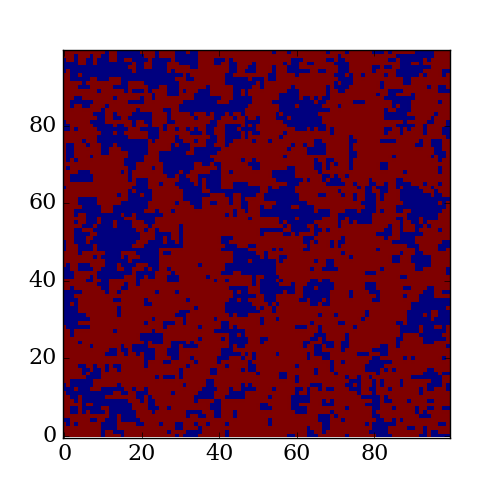
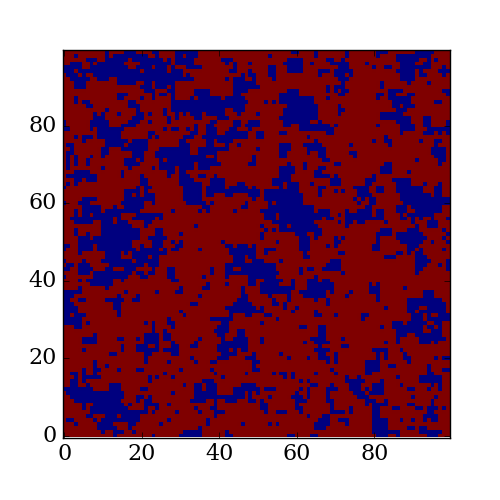
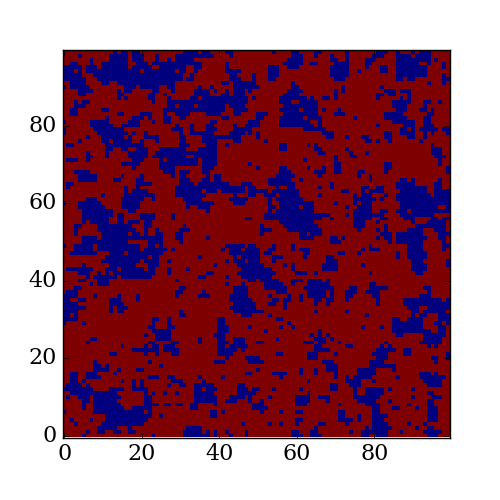
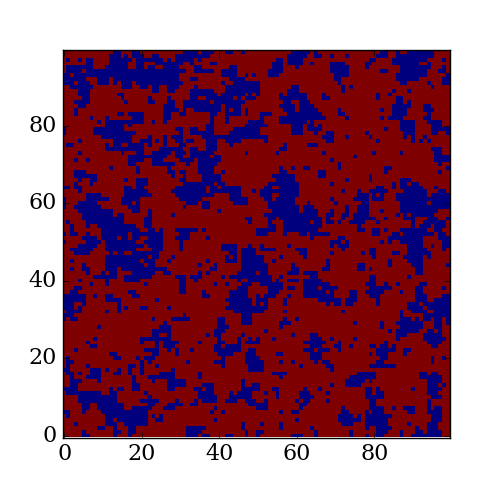
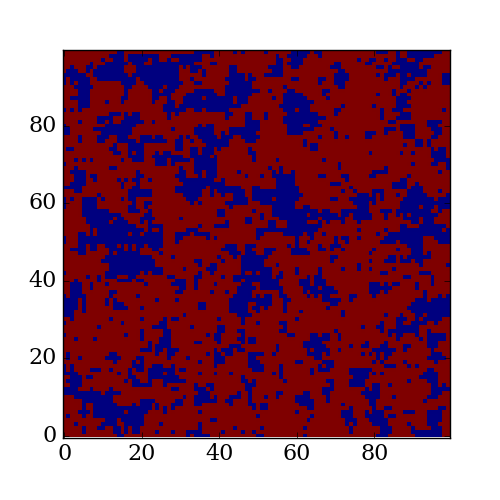
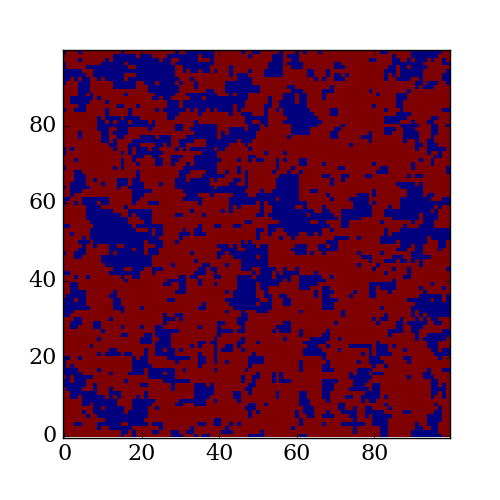
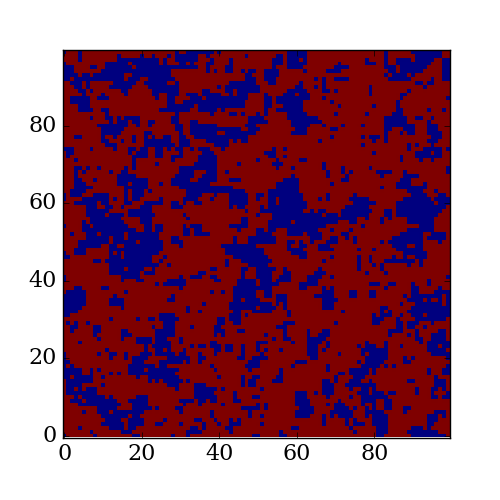
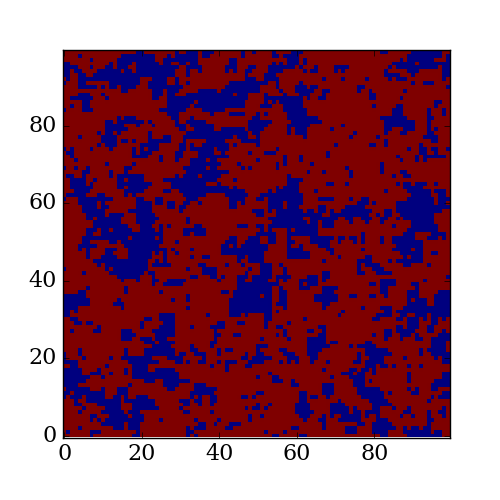
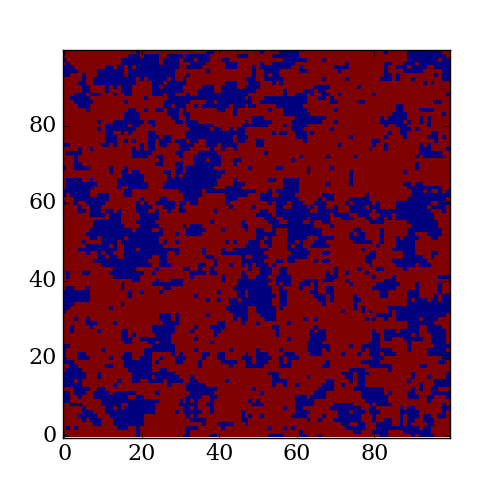
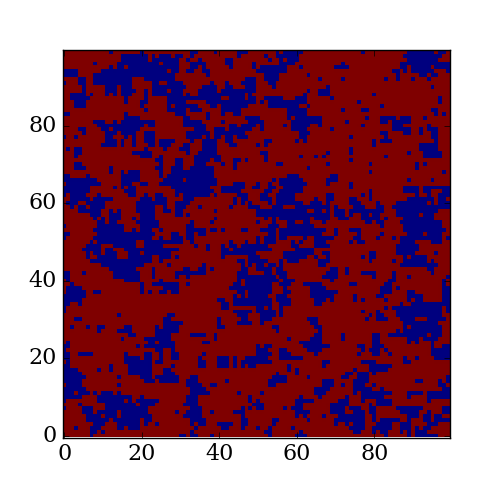
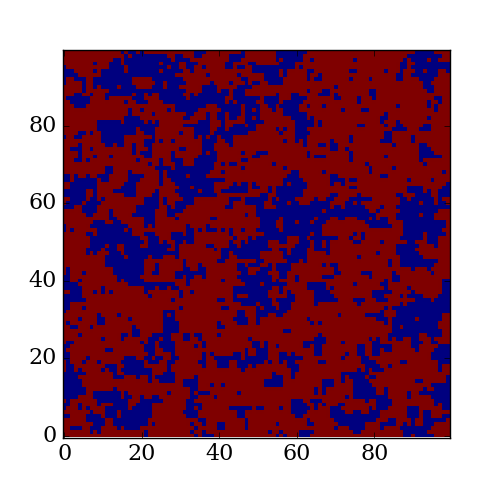
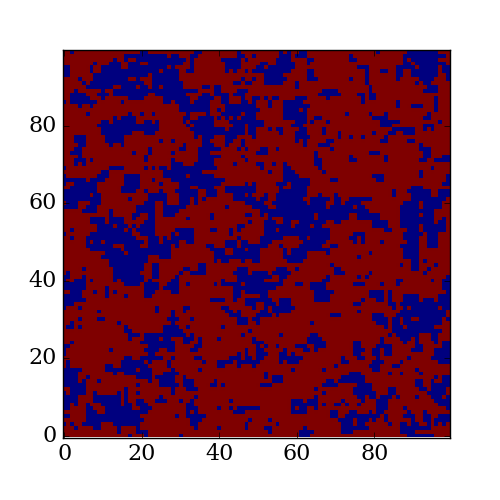
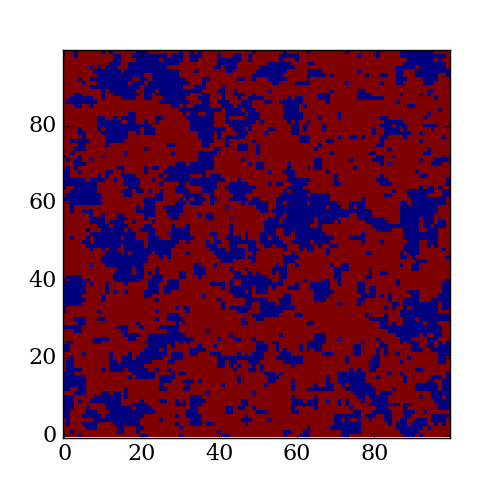

In [32]:
alpha0=0.4 #on peut changer le alpha ici pour visualiser les différentes valeurs
sp = numpy.ones([nx,ny])
states_alpha = ising_model_metropolis(sp, NMC, nx, ny, alpha0)
    
fig = pyplot.figure(figsize=(5,5))
img1 = pyplot.imshow(states_alpha[0],interpolation="none",origin='lower',\
                     vmin=-1, vmax=1)
def animate(i):
        img1.set_array(states_alpha[i])
    
animation.FuncAnimation(fig, animate, frames=NMC, interval=200)


In [33]:
import numba
from numba import jit

In [34]:
def mean_magnetisation(alpha,NMC,state_alpha):
    magnetisation_NMC=numpy.empty([2,NMC-50])
    summagTOT=0
    for i in range (50,NMC):#j'ai pris seulement les états au-delà de 10 pour ne pas perturber la moyenne (cf notebook)
        summag=0
        for j in range (nx):
            for k in range (ny):
                summag=summag+state_alpha[i,j,k] 
        magnetisation_NMC[0,i-50]=i
        magnetisation_NMC[1,i-50]=summag/(nx*ny)
        summagTOT=summagTOT + summag
    pyplot.plot(magnetisation_NMC[0], magnetisation_NMC[1],label=r'$<M>$')
    pyplot.legend()
    pyplot.tight_layout()
    return summagTOT/((NMC-50)*nx*ny)

In [35]:
def mean_energy(alpha,NMC,state_alpha):
    
    sumen=0
    for i in range (50,NMC):
        for j in range (nx):
            for k in range (ny):
                sumen=sumen+energy_at_site(state_alpha[i],alpha,state_alpha[i,j,k],j,k)
    return sumen/((NMC-50)*nx*ny)

On définit un état initial avec tous les spins up.

0.32434000000000002

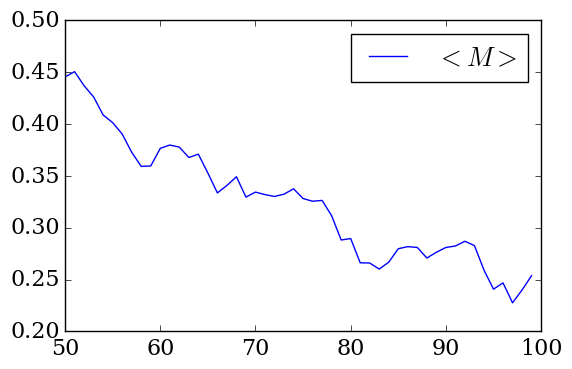

In [36]:
nx=100
ny=100

state_up = numpy.ones([nx,ny])
states_alpha=ising_model_metropolis(state_up, 100, nx, ny, 0.4)
mean_magnetisation(0.4,100,states_alpha)

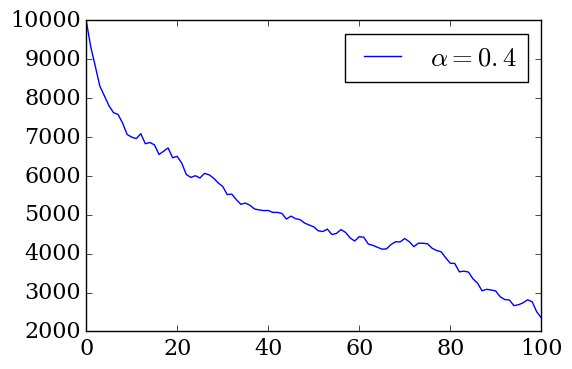

In [37]:
state_up=numpy.ones([nx,ny])
states_alpha=ising_model_metropolis(state_up, 100, nx, ny, 0.4)
pyplot.figure()
pyplot.plot(states_alpha.sum(axis=(1,2)),label=r'$\alpha=0.4$')
pyplot.legend()
pyplot.tight_layout()

0.0
0.1
0.2
0.30000000000000004
0.4
0.5
0.6
0.7
0.7999999999999999
0.8999999999999999
0.9999999999999999


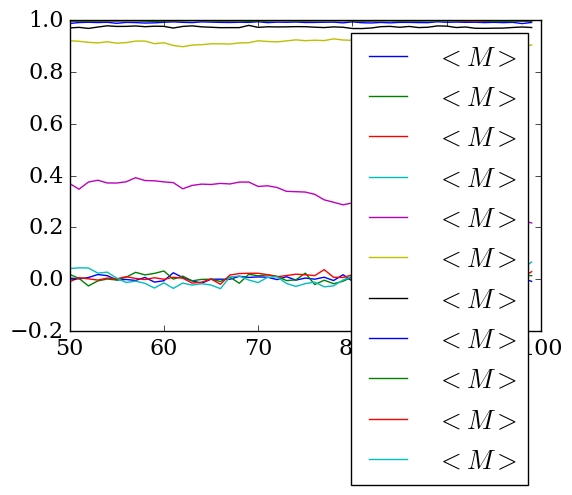

In [38]:
N=10
d_alpha=1.0/N
alpha=0.0
i=0
magnetisation=numpy.zeros([2,N+1])
while i<=N:
    state_up=numpy.ones([nx,ny])
    state_alpha=ising_model_metropolis(state_up, NMC, nx, ny, alpha)
    magnetisation[0,i]=alpha
    print(alpha)
    magnetisation[1,i]=mean_magnetisation(alpha,100,state_alpha)
    alpha=alpha+d_alpha
    i=i+1

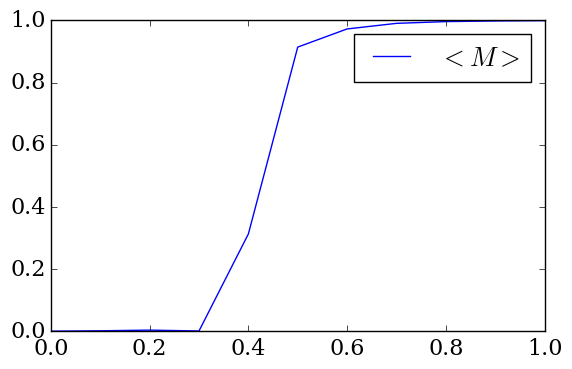

In [39]:
pyplot.plot(magnetisation[0], magnetisation[1],label=r'$<M>$')
pyplot.legend()
pyplot.xlim(0.0,1.0)
pyplot.tight_layout()

In [40]:
N=10
d_alpha=1.0/N
alpha=0.0
i=0
energy=numpy.zeros([2,N+1])
while i<=N:
    state_up=numpy.ones([nx,ny])
    state_alpha=ising_model_metropolis(state_up, NMC, nx, ny, alpha)
    energy[0,i]=alpha
    print(alpha)
    energy[1,i]=mean_energy(alpha,100,state_alpha)
    alpha=alpha+d_alpha
    i=i+1

0.0
0.1
0.2
0.30000000000000004
0.4
0.5
0.6
0.7
0.7999999999999999
0.8999999999999999
0.9999999999999999


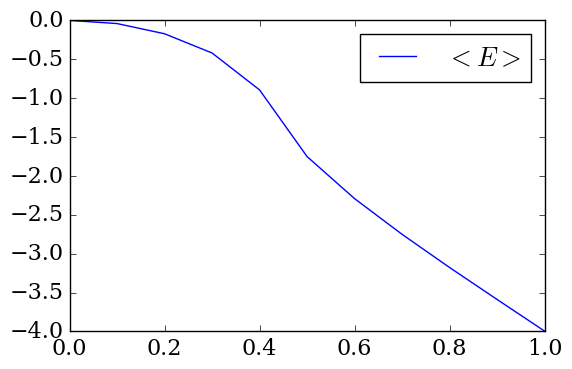

In [41]:
pyplot.plot(energy[0],energy[1],label=r'$<E>$')
pyplot.legend()
pyplot.xlim(0.0,1.0)
pyplot.tight_layout()

$<M>$ et $<E>$ deviennent tous deux non nuls à partir de $\alpha\approx0.35$. On peut donc s'attendre à ce que la transition de phase ait lieu à cette valeur, où au point d'inflexion qui a lieu entre 0.4 et 0.5.

Formules utilisées:
- Magnétisation:
$$<M> = \frac{\sum_k M_k}{N_k}
$$
$$M_k=\sum_{i=1}^N s_i$$ 
- Energie: 
$$<E> = \frac{\sum_k E_k}{N_k}
$$
$$
E_k=-2\alpha\sum_{pairs(i,j)} s_i s_j$$


#### Essayons avec une autre configuration initiale, où les spins sont up sur les bords et distribués aléatoirement à l'intérieur.

In [42]:
state_up_on_edges = numpy.ones([nx,ny])
interior_grid = numpy.random.randint(0,2,(nx,ny))
state_up_on_edges[1:-1,1:-1] = interior_grid[1:-1,1:-1]
state_up_on_edges[state_up_on_edges==0] =-1
initial_edge=state_up_on_edges.copy()

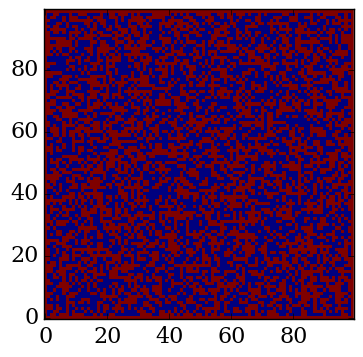

In [43]:
pyplot.figure(figsize=(4,4))
pyplot.imshow(initial_edge,interpolation="none",origin='lower')

0.0
0.1
0.2
0.30000000000000004
0.4
0.5
0.6
0.7
0.7999999999999999
0.8999999999999999
0.9999999999999999


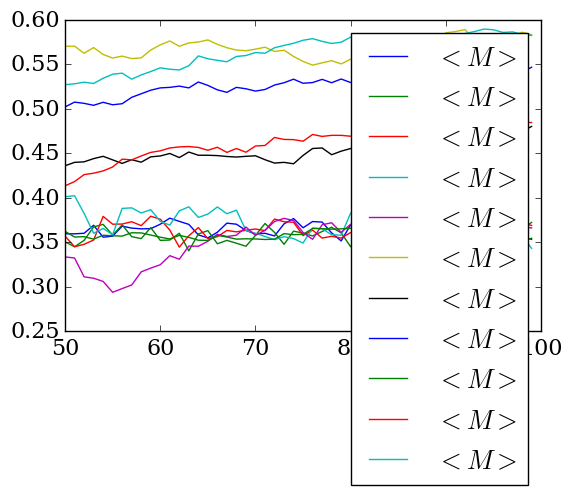

In [44]:
N=10
d_alpha=1.0/N
alpha=0.0
i=0
magnetisation2=numpy.zeros([2,N+1])
while i<=N:
    state=state_up_on_edges.copy()
    state_alpha=numpy.ones([NMC+1,nx,ny])
    state_alpha[:,10:-10,10:-10]=ising_model_metropolis(state, NMC, nx, ny, alpha)[:,10:-10,10:-10]
    magnetisation2[0,i]=alpha
    print(alpha)
    magnetisation2[1,i]=mean_magnetisation(alpha,100,state_alpha)
    alpha=alpha+d_alpha
    i=i+1

In [45]:
N=10
d_alpha=1.0/N
alpha=0.0
i=0
energy2=numpy.zeros([2,N+1])
while i<=N:
    state=state_up_on_edges.copy()
    state_alpha=numpy.ones([NMC+1,nx,ny])
    state_alpha[:,10:-10,10:-10]=ising_model_metropolis(state, NMC, nx, ny, alpha)[:,10:-10,10:-10]
    energy2[0,i]=alpha
    print(alpha)
    energy2[1,i]=mean_energy(alpha,NMC,state_alpha)
    alpha=alpha+d_alpha
    i=i+1

0.0
0.1
0.2
0.30000000000000004
0.4
0.5
0.6
0.7
0.7999999999999999
0.8999999999999999
0.9999999999999999


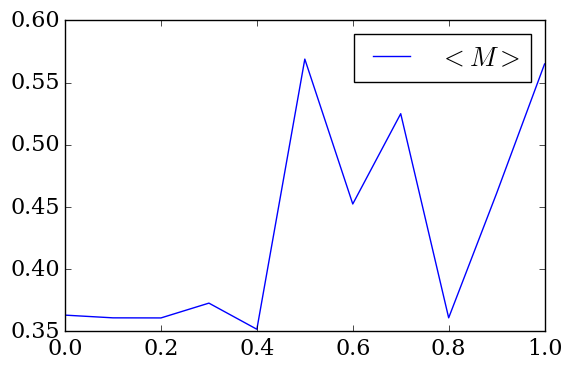

In [46]:
pyplot.plot(magnetisation2[0], magnetisation2[1],label=r'$<M>$')
pyplot.legend()
pyplot.xlim(0.0,1.0)
pyplot.tight_layout()

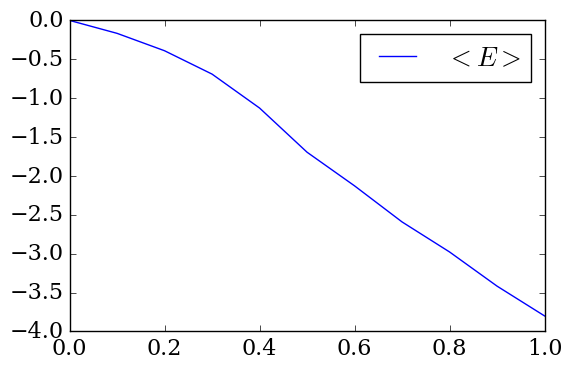

In [47]:
pyplot.plot(energy2[0],energy2[1],label=r'$<E>$')
pyplot.legend()
pyplot.xlim(0.0,1.0)
pyplot.tight_layout()

c'est bizarre comme truc mais bon apparemment c'est normal... reste à savoir pourquoi.